# Prudential Multiple Consensus model

# I. Understand the data

## 1.1 Summary

Due to confidential reasons, only three fields of data are known:
* **Time**: the seconds elapsed between each transaction and the first transaction in the dataset
* **Amount**: the transaction amount
* **Class**: the class feature that give information about each transaction was fraud or not (1 for fraud and 0 for legitimate)

During exploring, the data has shown some remarkable characteristics:
* There is no **NaN** or **Null** values found
* The data is extremely imbalanced with **99.83%** for legitimate txn and **0.17%** for fraud txn

## 1.2 Quick look at the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Apply the default theme
sns.set_theme()
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# Import the data
data = pd.read_csv("creditcard.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## 1.3 Checking for Null values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Check for total null values
data.isna().sum().sum()

0

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
data.describe().iloc[:,-2:]

,Amount,Class
count,284807.000000,284807.000000
mean,88.349619,0.001727
std,250.120109,0.041527
min,0.000000,0.000000
25%,5.600000,0.000000
50%,22.000000,0.000000
75%,77.165000,0.000000
max,25691.160000,1.000000


In [12]:
# The classes are heavily skewed we need to solve this issue later.
num_legit = int(data.loc[data['Class'] == 0,'Class'].value_counts())
num_fraud = int(data.loc[data['Class'] == 1,'Class'].value_counts())

print('No. legitimate txns :',num_legit)
print('No. fraudulent txns :',num_fraud)
print()
print('Legitimate txns account for %.4f%% of total transaction'% float(data.loc[data['Class'] == 0,'Class'].value_counts()/len(data)*100))
print('Fraudulentb txns account for %.4f%% of total transaction'% float(data.loc[data['Class'] == 1,'Class'].value_counts()/len(data)*100))

No. legitimate txns : 284315
No. fraudulent txns : 492

Legitimate txns account for 99.8273% of total transaction
Fraudulentb txns account for 0.1727% of total transaction


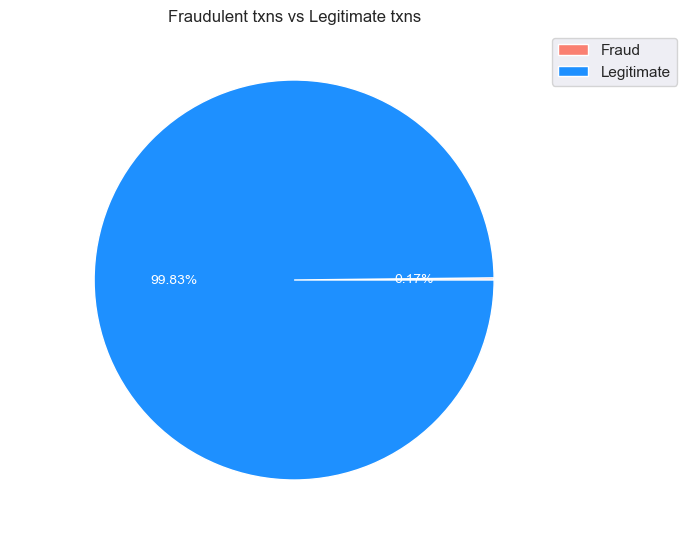

In [13]:
fig_imba = plt.figure(figsize = [6,5], dpi=100)
axes_imba = fig_imba.add_axes([0, 0, 1, 1])

# plot class ratio pie chart
def plot_class_ratio(num_fraud, num_legit, startangle=0):
    # Create a pie chart of the two type of class
    types = ['Fraud', 'Legitimate']
    num_class = [num_fraud, num_legit]

    colors=['salmon', 'dodgerblue']


    # Provide values, what to explode and by how much, labels, colors, pct for values,
    # whether to shadow, amount to rotate pie, pie text color
    wedges, text, autotexts = plt.pie(num_class, labels=types, colors=colors,
                                     shadow=False, autopct='%.2f%%',
                                     startangle=startangle, textprops=dict(color='w', fontsize='small'))
    plt.legend(wedges, types, loc=0, bbox_to_anchor=[1, 1])
    plt.title('Fraudulent txns vs Legitimate txns')

plot_class_ratio(num_fraud, num_legit)   

# 2 Data Pre-Processing

## 2.1 Initialize

Before spliting, I **keep all 30 features** for training the model. This is because 
* For the unknown features, since I do not have much data about these data, excluding anyone of them can cause information loss.
* For known features, I still keep Time and Amount feature since fraudster may target in some specific amount payment or time during the days (proved).

When splitting: 
* Spliting them with the ratio of 80/20 and random_state=1 for reproducing purpose

### 2.1.1 Inputing algorithms and metrics

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Initialize algorithms
algorithms =["MLP", "GNB", "ADA", "GBC", "RFC"]

classifiers = {
  "MLP": MLPClassifier(random_state=33),
  "GNB": GaussianNB(),
  "ADA": AdaBoostClassifier(random_state=33),
  "GBC": GradientBoostingClassifier(random_state=33),
  "RFC": RandomForestClassifier(random_state=33),
    }

# Initialize metrics
metrics = ['Sensitivity', 'Fallout', 'AUC']
sensi_score = np.zeros([10,5])
fallout_score = np.zeros([10,5])
auc_score = np.zeros([10,5])

dict_score = {'Sensitivity': sensi_score, 'Fallout' : fallout_score, 'AUC' : auc_score}

### 2.1.1 Metrics Calculation

In [5]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import roc_curve, auc

# Create the class for calculating metric
class metric_score:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.tn, self.fp, self.fn, self.tp = cm(y_true,y_pred).ravel()
    
    def sensi_score(self):
      return self.tp/(self.tp+self.fn)

    def fallout_score(self):
      return self.fp/(self.fp+self.tn)

    def auc_score(self):
        fpr, tpr, thresholds  = roc_curve(self.y_true, self.y_pred)
        return auc(fpr, tpr)

### 2.1.2 Performance Comparison

In [6]:
def plot_algo_comparison(dict_score):
    fig_score, axes_score = plt.subplots(figsize=(8,8), nrows=3, ncols=1)
    
    # Calculate each metrics
    for index_metric, value_metric in enumerate(metrics[:3]):
        fig_score.tight_layout()
        bar = sns.barplot(data=pd.DataFrame(dict_score[value_metric], columns=algorithms) ,ax=axes_score[index_metric], orient='h',
                    color="salmon", capsize=.2, errcolor="0.8", linewidth=0, )
        axes_score[index_metric].set_title(f'{value_metric}')

        # Add data labels to each bar
        for i, p in enumerate(bar.patches):
            width = p.get_width()
            mean_value = format(width, '.3f')
            std_value = format(np.std(dict_score[value_metric][:,i]), '.3f')
            label_text = f'{mean_value} +/- {std_value}'
            axes_score[index_metric].text(width + 0.05*width , p.get_y() + p.get_height() / 2, label_text,
                 ha='left', va='center', color='grey', fontweight='medium')

In [7]:
def bf_af_comparison(dict_score_bf, dict_score_af, score='AUC', hue="Sampling", bf="Before", af="After"):
    
    # Create DataFrame for bf data
    df_bf = pd.DataFrame(dict_score_bf[score], columns=classifiers.keys())
    df_bf.reset_index(inplace=True)
    df_bf.rename(columns={"index": "Fold"}, inplace=True)
    df_bf.Fold +=1
    df_bf[hue] = bf
    
    # Create DataFrame for af data
    df_af = pd.DataFrame(dict_score_af[score], columns=classifiers.keys())
    df_af.reset_index(inplace=True)
    df_af.rename(columns={"index": "Fold"}, inplace=True)
    df_af.Fold +=1
    df_af[hue] = af

    # Merge two DataFrame
    merged_df = pd.concat([df_bf, df_af])
    
    # Unpivot Data by each Fold and Sampling
    melted_df = pd.melt(merged_df, id_vars=['Fold', hue], var_name='Algorithm', value_name='Performance')
    
    #Plot boxplot for comparison
    fig_score, axes_score = plt.subplots(figsize=(8,8), nrows=1, ncols=1)
    sns.boxplot(x='Algorithm', y='Performance', hue=hue, data=melted_df, palette="pastel", ax=axes_score)
    axes_score.set_title(score)

## 2.2 Data Distribution (Skewness and Kurtosis)

For the **unknown features**:
* All of them have already been PCA (information from the datasource). Also, when investigating the data all of them are already put in the same scale (with **mean** approximately equal to **0** and **standard deviation** approximately equal to **1**)

For the **known features**:
* Apprently, **Time** and **Amount** feature **haven't been scaled** as other columns as we can see from their distribution, mean and std --> need to be scaled before training 
* To put them in the same scaled, I perform standard scaling on these features

### 2.2.1 Before handling skewed distribution

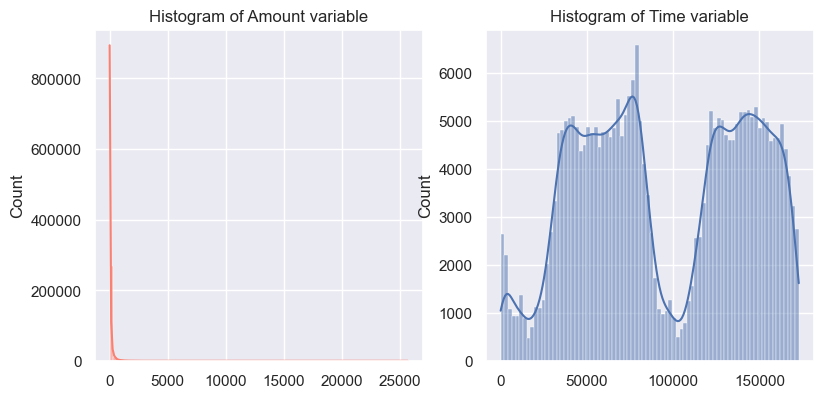

In [143]:
fig_dist_known, axes_dist_known = plt.subplots(figsize=(8,4), nrows=1, ncols=2,)
val_amount = data.loc[:,'Amount'].values
val_time = data.loc[:,'Time'].values

plt.tight_layout()

sns.histplot(val_amount, bins=80, ax=axes_dist_known[0], kde=True, color='salmon');
# axes_dist_known[0].set_xlim(0,max(val_amount))
axes_dist_known[0].set_title('Histogram of Amount variable');

sns.histplot(val_time, bins=80, ax=axes_dist_known[1], kde=True);
# axes_dist_known[1].set_xlim(0,max(val_time))
axes_dist_known[1].set_title('Histogram of Time variable');

In [18]:
from scipy.stats import kurtosis

print("Skewness:")
print(data.loc[:,['Amount','Time']].skew(),"\n")
print("Kurtosis:")
print(data.loc[:,['Amount','Time']].kurtosis())

Skewness:
Amount    16.977724
Time      -0.035568
dtype: float64 

Kurtosis:
Amount    845.092646
Time       -1.293530
dtype: float64


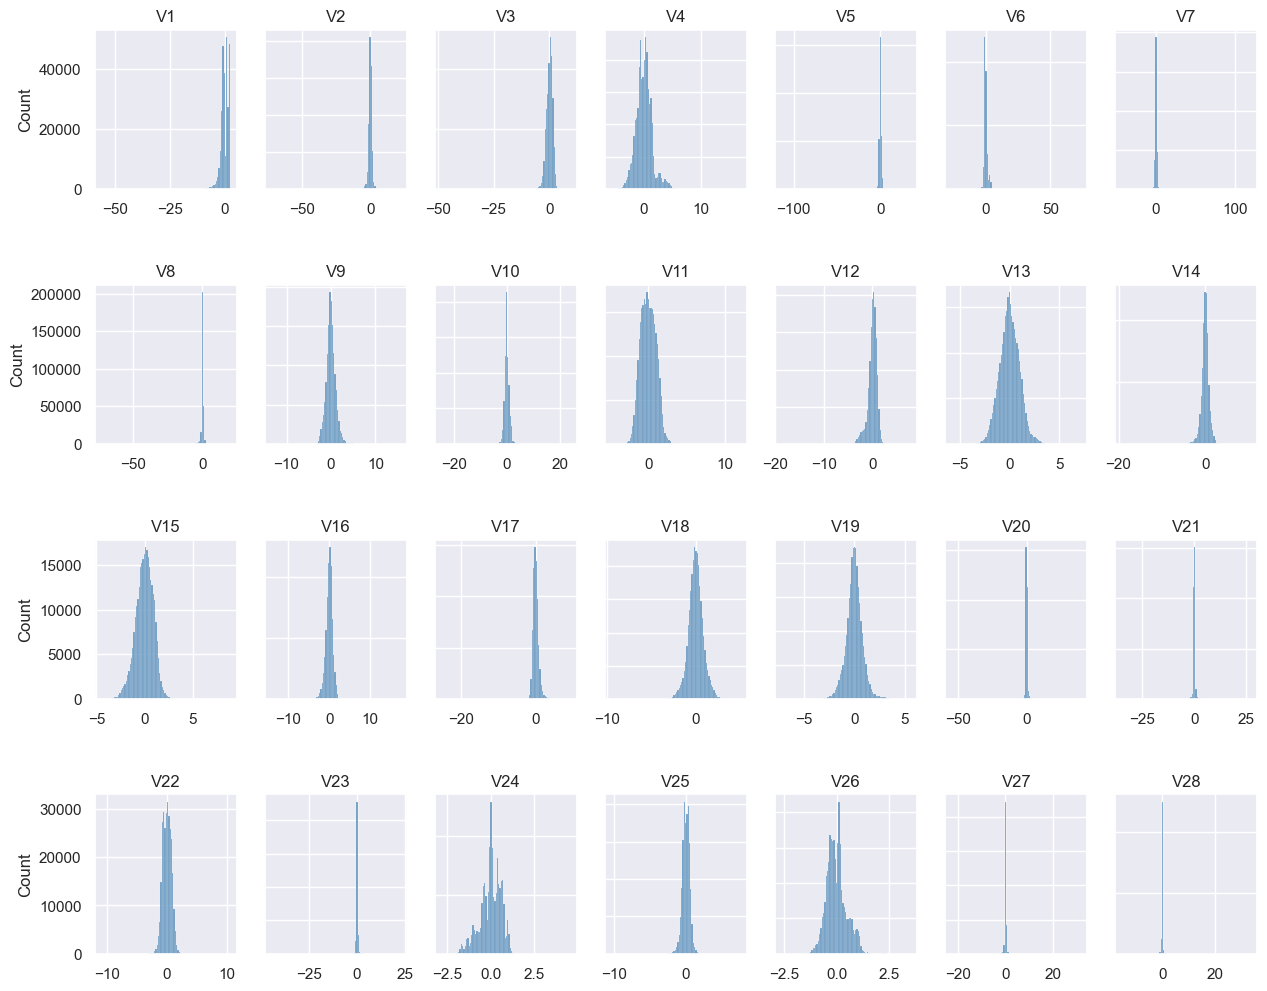

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))


for index_col, val_col in enumerate(data.loc[:, 'V1':'V28']):
    ax = plt.subplot(4, 7, index_col + 1)

    sns.histplot(data[val_col].values, bins=100, color='steelblue')
    plt.title(f'V{index_col + 1}')

    if index_col % 7 != 0:
        ax.set(yticklabels=[])
        ax.set(ylabel='')

# Adjust spacing between subplots if necessary
plt.subplots_adjust(hspace=0.6)

# Show the plot
plt.show()

In [19]:
df_data_unknown = data.drop(["Amount","Time","Class"],axis=1)

df_skewness = df_data_unknown.skew()
df_skewness = pd.DataFrame(df_skewness[abs(df_skewness)>3], columns=["Skewness"])
df_skewness

,Skewness
V1,-3.280667
V2,-4.624866
V8,-8.521944
V17,-3.844914
V21,3.592991
V23,-5.875140
V28,11.192091


In [20]:
df_kurtosis = df_data_unknown.kurtosis()
df_kurtosis = pd.DataFrame(df_kurtosis[abs(df_kurtosis)>10], columns=["Kurtosis"])
df_kurtosis

,Kurtosis
V1,32.486679
V2,95.773106
V3,26.619551
V5,206.904560
V6,42.642494
V7,405.607417
V8,220.586974
V10,31.988239
V12,20.241870
V14,23.879462


In [21]:
import re
list_skew = list(set(list(df_skewness.index)) | set(list(df_kurtosis.index)))
list_skew = sorted(list_skew, key=lambda x: int(re.findall(r'\d+', x)[0]))

print(list_skew)

['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V27', 'V28']


In [106]:
%time
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)


# Make the prediction and take the probability
train_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)
train_proba = np.zeros([len(X), len(algorithms)], dtype = np.int32)

pred_proba = np.zeros([len(X), len(algorithms)])
pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    for clf_index, clf_name in enumerate(algorithms):
        classifiers[clf_name].fit(X[train_index], y[train_index])
        
        
        train_value[[train_index], clf_index:clf_index+1] = classifiers[clf_name].predict(X[train_index]).reshape(-1, 1)
        train_proba[[train_index], clf_index:clf_index+1] = classifiers[clf_name].predict_proba(X[train_index])[:, 1].reshape(-1, 1)
        
        print(clf_name)
        
        pred_proba[[test_index], clf_index:clf_index+1] = classifiers[clf_name].predict_proba(X[test_index])[:, 1].reshape(-1, 1)
        pred_value[[test_index], clf_index:clf_index+1] = classifiers[clf_name].predict(X[test_index]).reshape(-1, 1)
        
        # Calculate metrics
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
        
        print(metric.sensi_score())
        print(metric.fallout_score())
        print(metric.auc_score())

# pred_proba_skew_bf = pred_proba
pred_value_skew_bf = pred_value.copy()
        
for clf_index, clf_name in enumerate(algorithms):
    print(clf_name)
    print('\nCV sensitivity: %.3f +/- %.3f' %(np.mean(sensi_score[:,clf_index]), np.std(sensi_score[:,clf_index])))
    print('\nCV fallout: %.3f +/- %.3f' %(np.mean(fallout_score[:,clf_index]), np.std(fallout_score[:,clf_index])))
    print('\nCV auc score: %.3f +/- %.3f' %(np.mean(auc_score[:,clf_index]), np.std(auc_score[:,clf_index])))

Wall time: 996 µs
MLP
0.0
0.0
0.5
GNB
0.9032258064516129
0.01447984823260676
0.9443729791095031
ADA
0.7580645161290323
0.00011614851523481358
0.8789741838068987
GBC
0.7096774193548387
0.00034844554570444074
0.8546644869045672
RFC
0.7903225806451613
0.00015486468697975143
0.8950838579790907
MLP
0.725
0.0003094657846891803
0.8623452671076555
GNB
0.7
0.014970407334339098
0.8425147963328304
ADA
0.55
7.736644617229508e-05
0.7749613167769139
GBC
0.55
0.00023209933851688522
0.7748839503307416
RFC
0.65
0.00011604966925844261
0.8249419751653707
MLP
0.0
0.0
0.5
GNB
0.7380952380952381
0.01207009942357538
0.8630125693358314
ADA
0.7142857142857143
3.8686216101203144e-05
0.8571235140348065
GBC
0.7142857142857143
0.0
0.8571428571428572
RFC
0.7142857142857143
0.0
0.8571428571428572
MLP
0.0
0.0
0.5
GNB
0.5862068965517241
0.01283736756631351
0.7866847644927053
ADA
0.5862068965517241
0.00030933415822442193
0.7929487811967498
GBC
0.5517241379310345
0.00034800092800247467
0.775688068501516
RFC
0.6896551724

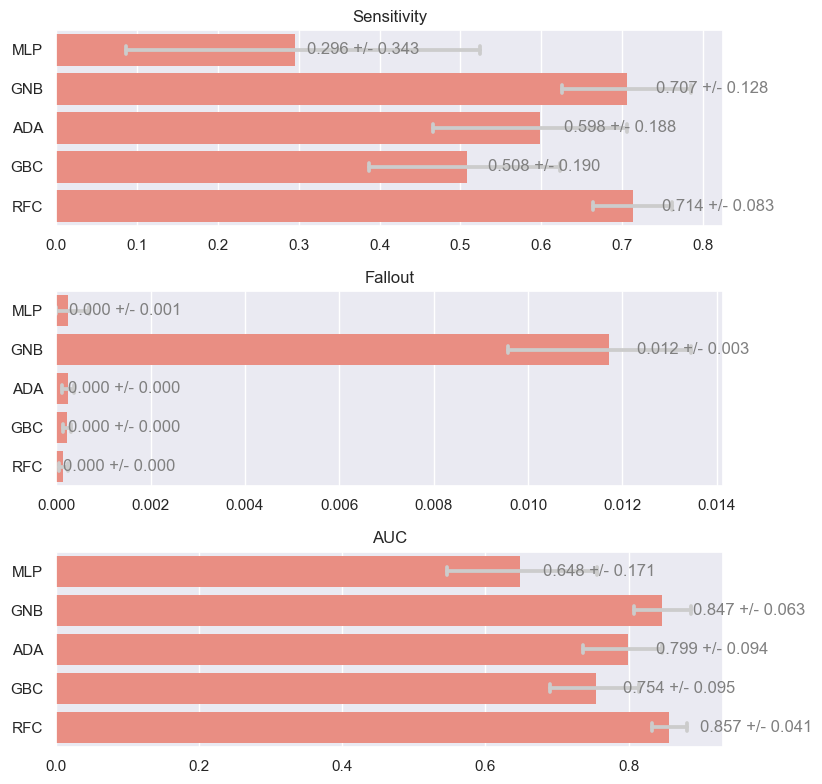

In [107]:
# save the result
# dict_score_skew_bf = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

# Plot metrics           
plot_algo_comparison(dict_score_skew_bf)

### 2.2.2 After handling skewed distribution

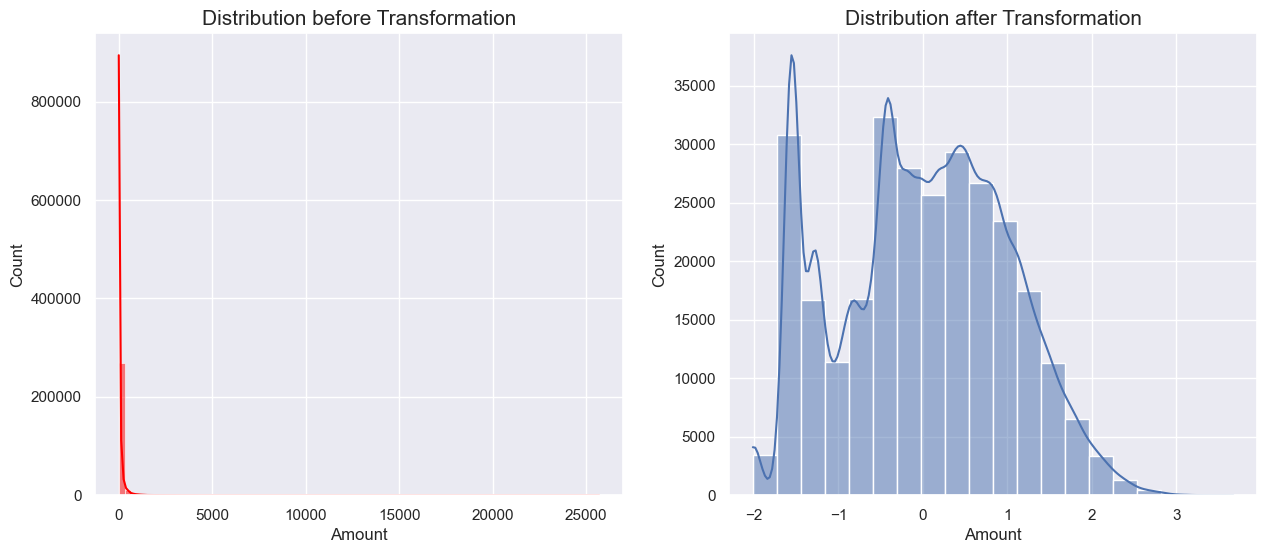

Skewness was 16.98 before & is 0.02 after Yeo-johnson transformation.
kurtosis was 845.09 before & is -0.76 after Yeo-johnson transformation.


In [161]:
from sklearn.preprocessing import PowerTransformer
def yeojohntrans(feature, data=data):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    yeojohnTr = PowerTransformer(standardize=True)   # not using method attribute as yeo-johnson is the default

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(data[feature], bins=80, kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_yeojohn = pd.DataFrame(yeojohnTr.fit_transform(data[feature].values.reshape(-1,1)))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_yeojohn,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    old_skew = data.loc[:,[feature]].skew()
    old_kurtosis = data.loc[:,[feature]].kurtosis()
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_yeojohn.skew()[0],2)} after Yeo-johnson transformation.")
    print(f"kurtosis was {round(old_kurtosis[feature],2)} before & is {round(df_yeojohn.kurtosis()[0],2)} after Yeo-johnson transformation.")
    
yeojohntrans(feature="Amount")

In [162]:
arr_tr = data.loc[:, list_skew].values

for index_feature, feature in enumerate(list_skew):
    print("\n",feature)
    old_skew = data.loc[:,[feature]].skew()
    old_kurtosis = data.loc[:,[feature]].kurtosis()
    
    yeojohnTr = PowerTransformer(standardize=True)
    df_yeojohn = pd.DataFrame(yeojohnTr.fit_transform(data[feature].values.reshape(-1,1)))
    
    if (abs(old_skew[feature]) < abs(df_yeojohn.skew()[0])) & (abs(old_kurtosis[feature]) < abs(df_yeojohn.kurtosis()[0])):
        list_skew.remove(feature)
        continue
    else:
        arr_tr[:,index_feature] = df_yeojohn.values.reshape(1,-1)
        print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_yeojohn.skew()[0],2)} after Yeo-johnson transformation.")
        print(f"kurtosis was {round(old_kurtosis[feature],2)} before & is {round(df_yeojohn.kurtosis()[0],2)} after Yeo-johnson transformation.")
    


 V1
Skewness was -3.28 before & is -0.22 after Yeo-johnson transformation.
kurtosis was 32.49 before & is -0.01 after Yeo-johnson transformation.

 V2
Skewness was -4.62 before & is 0.33 after Yeo-johnson transformation.
kurtosis was 95.77 before & is 30.33 after Yeo-johnson transformation.

 V3
Skewness was -2.24 before & is -0.08 after Yeo-johnson transformation.
kurtosis was 26.62 before & is 1.63 after Yeo-johnson transformation.

 V5
Skewness was -2.43 before & is -1.17 after Yeo-johnson transformation.
kurtosis was 206.9 before & is 145.47 after Yeo-johnson transformation.

 V6

 V8
Skewness was -8.52 before & is 2.3 after Yeo-johnson transformation.
kurtosis was 220.59 before & is 120.85 after Yeo-johnson transformation.

 V10

 V14
Skewness was -2.0 before & is 0.11 after Yeo-johnson transformation.
kurtosis was 23.88 before & is 9.11 after Yeo-johnson transformation.

 V16
Skewness was -1.1 before & is 0.14 after Yeo-johnson transformation.
kurtosis was 10.42 before & is 8.77

In [163]:
list_skew
list_skew = [int(re.search(r'\d+', col).group()) for col in list_skew]
list_skew

[1, 2, 3, 5, 7, 8, 12, 14, 16, 17, 20, 21, 23, 28]

In [8]:
list_skew = [1, 2, 3, 5, 7, 8, 12, 14, 16, 17, 20, 21, 23, 28]

In [164]:
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)


# Make the prediction and take the probability
train_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)
train_proba = np.zeros([len(X), len(algorithms)], dtype = np.int32)

pred_proba = np.zeros([len(X), len(algorithms)])
pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f'Fold {i}')
    for clf_index, clf_name in enumerate(algorithms):
        transformer = ColumnTransformer(
            transformers=[('power_transform', PowerTransformer(standardize=True), list_skew) ])
        
        model = classifiers[clf_name]
        pipeline = Pipeline([('transformer', transformer), ('model', model)])
        pipeline.fit(X[train_index], y[train_index])
        
        # train_value[:, clf_index:clf_index+1] = classifiers[clf_name].predict(X_train).reshape(-1, 1)
        # train_proba[:, clf_index:clf_index+1] = classifiers[clf_name].predict_proba(X_train).reshape(-1, 1)
        
        print(clf_name)
        
        # pred_proba[[test_index], clf_index:clf_index+1] = pipeline.predict_proba(X[test_index])[:, 1].reshape(-1, 1)
        pred_value[[test_index], clf_index:clf_index+1] = pipeline.predict(X[test_index]).reshape(-1, 1)
        
        # Calculate metrics
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
        
        print(metric.sensi_score())
        print(metric.fallout_score())
        print(metric.auc_score())
        
pred_value_skew_af = pred_value.copy()
        
        
for clf_index, clf_name in enumerate(algorithms):
    print(clf_name)
    print('\nCV sensitivity: %.3f +/- %.3f' %(np.mean(sensi_score[:,clf_index]), np.std(sensi_score[:,clf_index])))
    print('\nCV fallout: %.3f +/- %.3f' %(np.mean(fallout_score[:,clf_index]), np.std(fallout_score[:,clf_index])))
    print('\nCV auc score: %.3f +/- %.3f' %(np.mean(auc_score[:,clf_index]), np.std(auc_score[:,clf_index])))

Wall time: 0 ns
Fold 0
MLP
0.532258064516129
0.00011614851523481358
0.7660709580004471
GNB
0.8709677419354839
0.02028727399434744
0.9253402339705682
ADA
0.3548387096774194
0.0
0.6774193548387097
GBC
0.7580645161290323
0.0005420264044291301
0.8787612448623016
RFC
0.6774193548387096
0.00015486468697975143
0.8386322450758649
Fold 1
MLP
0.7
7.736644617229508e-05
0.8499613167769139
GNB
0.7
0.01992185988936598
0.840039070055317
ADA
0.425
3.868322308614754e-05
0.7124806583884569
GBC
0.55
7.736644617229508e-05
0.7749613167769139
RFC
0.7
0.00015473289234459016
0.8499226335538278
Fold 2
MLP
0.47619047619047616
3.8686216101203144e-05
0.7380758949871875
GNB
0.7380952380952381
0.017099307516731787
0.8604979652892532
ADA
0.4523809523809524
7.737243220240629e-05
0.726151789974375
GBC
0.5714285714285714
0.00030948972880962515
0.7855595408498809
RFC
0.6904761904761905
0.0
0.8452380952380952
Fold 3
MLP
0.6551724137931034
0.00015466707911221097
0.8275088733569956
GNB
0.6551724137931034
0.0202227205939215

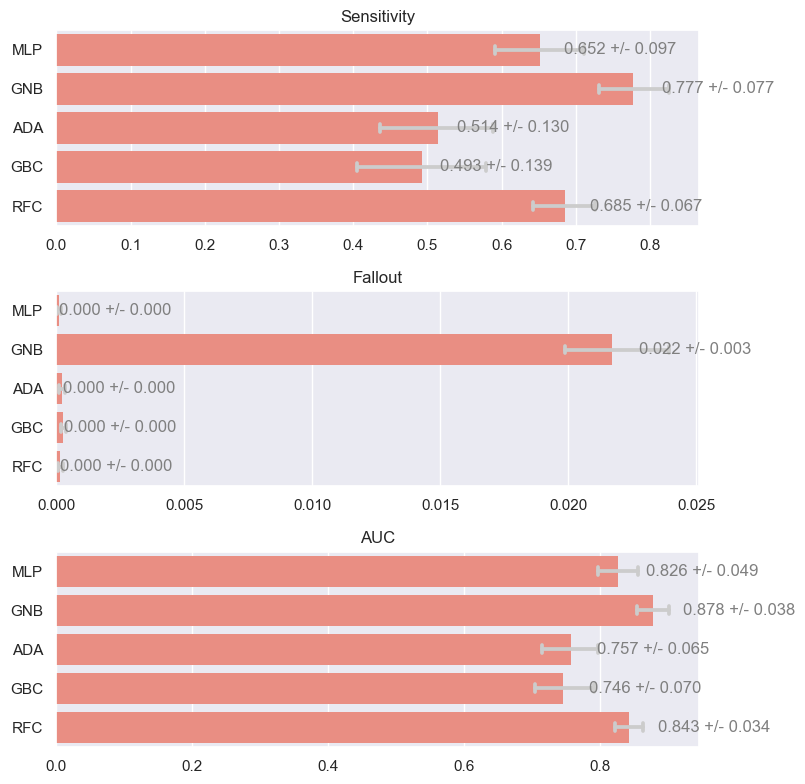

In [184]:
# save the result
# dict_score_skew_af = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

plot_algo_comparison(dict_score_skew_af)

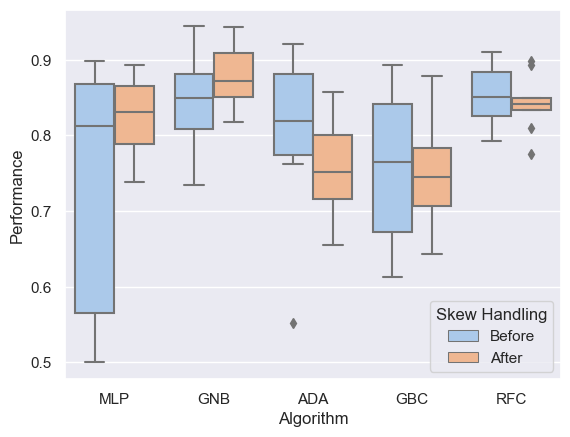

In [189]:
bf_af_comparison(dict_score_skew_bf, dict_score_skew_af, score="AUC", hue="Skew Handling")

## 2.3 Data Correlation and Collinearity

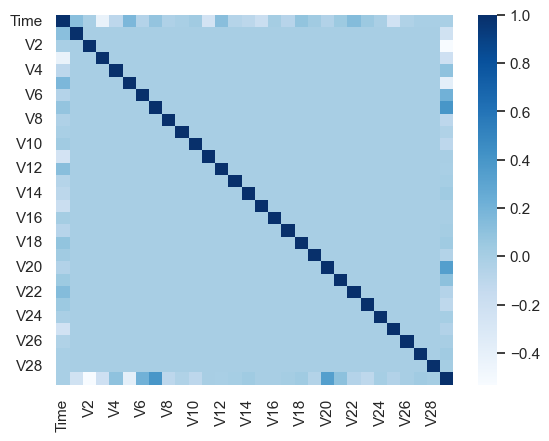

In [166]:
#Plot correlation matrix
import seaborn as sns
 
# checking correlation using heatmap
#plotting the heatmap for correlation

feat_labels = data.columns[:-1]  
df_data = pd.DataFrame(data.iloc[:, :-1], columns=feat_labels)
df_label = data.iloc[:,-1]  

df_data
axes_corr_mat = sns.heatmap(df_data.corr(), annot=False, cmap='Blues')

In [167]:
mask = (df_data.corr()<1)

pd.DataFrame(round(df_data.corr()[mask].max(),3), columns=['Maximum Correlation Value'])

,Maximum Correlation Value
Time,0.173
V1,0.117
V2,0.000
V3,0.000
V4,0.099
V5,0.173
V6,0.216
V7,0.397
V8,0.000
V9,0.000


In [168]:
df_data.corr()[mask].max()[df_data.corr()[mask].max()>0.6]

Series([], dtype: float64)

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


df_vif = calc_vif(df_data)

In [170]:
df_vif[df_vif["VIF"]> 2]

,variables,VIF
0,Time,2.339084
2,V2,3.869377
5,V5,2.753075
7,V7,2.510165
20,V20,2.233934
29,Amount,11.499791


In [171]:
# X_train = X_train[:,:-1]
# X_test = X_test[:,:-1]

df_vif = calc_vif(df_data.drop(columns='Amount'))

In [172]:
df_vif[df_vif["VIF"]> 2]

,variables,VIF


## 2.4 Class Imbalance

In [24]:
X = data.iloc[:, :-2].values

In [25]:
classifiers

{'MLP': MLPClassifier(random_state=33),
 'GNB': GaussianNB(),
 'ADA': AdaBoostClassifier(random_state=33),
 'GBC': GradientBoostingClassifier(random_state=33),
 'RFC': RandomForestClassifier(random_state=33)}

### 2.4.1 Before Sampling

In [175]:
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)


# Make the prediction and take the probability
train_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)
train_proba = np.zeros([len(X), len(algorithms)], dtype = np.int32)

pred_proba = np.zeros([len(X), len(algorithms)])
pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f'Fold {i}')
    for clf_index, clf_name in enumerate(algorithms):
        transformer = ColumnTransformer(
            transformers=[('power_transform', PowerTransformer(standardize=True), list_skew) ])
        
        model = classifiers[clf_name]
        if (clf_index<=1):
            pipeline = Pipeline([('transformer', transformer), ('model', model)])
        else:
            pipeline = Pipeline([('model', model)])
            
        pipeline.fit(X[train_index], y[train_index])
        
        # train_value[:, clf_index:clf_index+1] = classifiers[clf_name].predict(X_train).reshape(-1, 1)
        # train_proba[:, clf_index:clf_index+1] = classifiers[clf_name].predict_proba(X_train).reshape(-1, 1)
        
        print(clf_name)
        
        pred_proba[[test_index], clf_index:clf_index+1] = pipeline.predict_proba(X[test_index])[:, 1].reshape(-1, 1)
        pred_value[[test_index], clf_index:clf_index+1] = pipeline.predict(X[test_index]).reshape(-1, 1)
        
        # Calculate metrics
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
        
        print(metric.sensi_score())
        print(metric.fallout_score())
        print(metric.auc_score())
        
pred_value_imba_bf = pred_value.copy()
        
for clf_index, clf_name in enumerate(algorithms):
    print(clf_name)
    print('\nCV sensitivity: %.3f +/- %.3f' %(np.mean(sensi_score[:,clf_index]), np.std(sensi_score[:,clf_index])))
    print('\nCV fallout: %.3f +/- %.3f' %(np.mean(fallout_score[:,clf_index]), np.std(fallout_score[:,clf_index])))
    print('\nCV auc score: %.3f +/- %.3f' %(np.mean(auc_score[:,clf_index]), np.std(auc_score[:,clf_index])))

Wall time: 0 ns
Fold 0
MLP
0.5967741935483871
0.00011614851523481358
0.7983290225165761
GNB
0.8709677419354839
0.02028727399434744
0.9253402339705682
ADA
0.7903225806451613
0.0
0.8951612903225806
GBC
0.7741935483870968
0.0003871617174493786
0.8869031933348238
RFC
0.7903225806451613
0.00015486468697975143
0.8950838579790907
Fold 1
MLP
0.575
7.736644617229508e-05
0.7874613167769139
GNB
0.7
0.01992185988936598
0.840039070055317
ADA
0.6
0.00011604966925844261
0.7999419751653708
GBC
0.525
0.0001934161154307377
0.7624032919422845
RFC
0.65
0.0
0.825
Fold 2
MLP
0.5
0.0
0.75
GNB
0.7380952380952381
0.017099307516731787
0.8604979652892532
ADA
0.6904761904761905
0.0
0.8452380952380952
GBC
0.7142857142857143
0.0
0.8571428571428572
RFC
0.7142857142857143
0.0
0.8571428571428572
Fold 3
MLP
0.5517241379310345
7.733353955610548e-05
0.7758234021957392
GNB
0.6551724137931034
0.020222720593921585
0.8174748465995909
ADA
0.6206896551724138
0.00034800092800247467
0.8101708271222056
GBC
0.5862068965517241
0.00

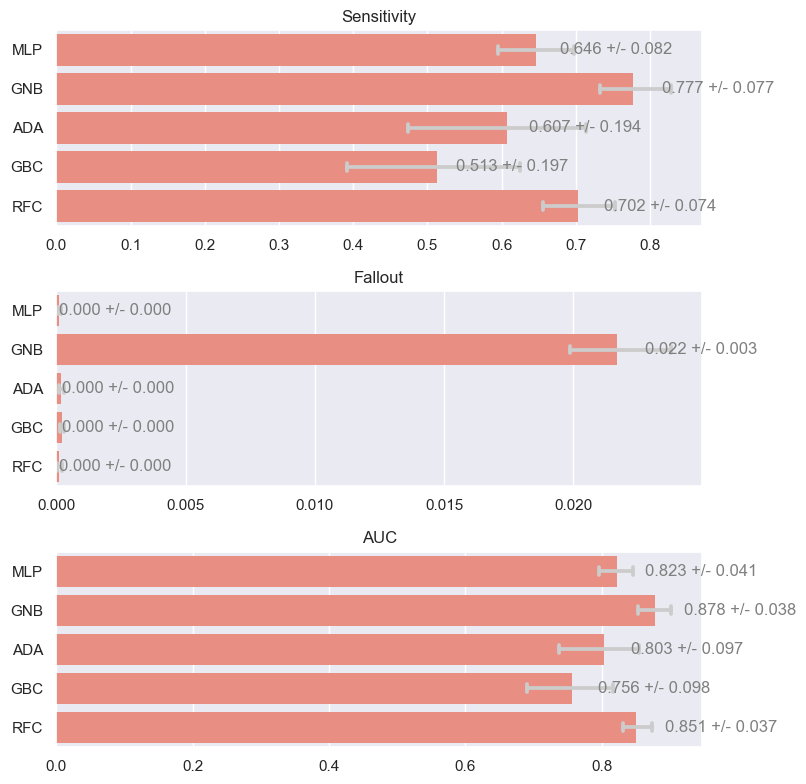

In [204]:
# save the result
# dict_score_imba_bf = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

plot_algo_comparison(dict_score_imba_bf)

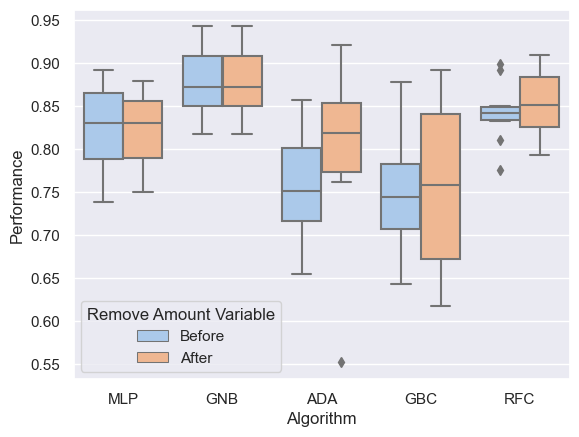

In [206]:
bf_af_comparison(dict_score_skew_af,dict_score_imba_bf, score="AUC", hue="Remove Amount Variable")

### 2.4.2 After Sampling

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=33)
adasyn = ADASYN(random_state=33)

In [61]:
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f'Fold {i}')
    print(len(train_index), len(test_index))

Fold 0
25897 25891
Fold 1
51788 25891
Fold 2
77679 25891
Fold 3
103570 25891
Fold 4
129461 25891
Fold 5
155352 25891
Fold 6
181243 25891
Fold 7
207134 25891
Fold 8
233025 25891
Fold 9
258916 25891


#### 2.4.2.1 SMOTE

In [212]:
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)

pred_proba = np.zeros([len(X), len(algorithms)])
pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)
train_proba = np.zeros([len(X), len(algorithms)])
train_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f'Fold {i}')
    X_train_resampled, y_train_resampled = BorderlineSMOTE(random_state=33).fit_resample(X[train_index], y[train_index])
    for clf_index, clf_name in enumerate(algorithms):
        
        transformer = ColumnTransformer(
                    transformers=[('power_transform', PowerTransformer(standardize=True), list_skew) ])
        model = classifiers[clf_name]
        
        
        model = classifiers[clf_name]
        
        if(clf_index<=1):
            pipeline = Pipeline([('transformer', transformer), ('model', model)])
        else:
            pipeline = Pipeline([('model', model)])
            
        pipeline.fit(X_train_resampled, y_train_resampled)
        
        train_value[train_index, clf_index:clf_index+1] = pipeline.predict(X[train_index]).reshape(-1, 1)
        train_proba[train_index, clf_index:clf_index+1] = pipeline.predict_proba(X[train_index])[:, 1].reshape(-1, 1)
        
        print(clf_name)
        
        pred_proba[[test_index], clf_index:clf_index+1] = pipeline.predict_proba(X[test_index])[:, 1].reshape(-1, 1)
        pred_value[[test_index], clf_index:clf_index+1] = pipeline.predict(X[test_index]).reshape(-1, 1)
        
        # Calculate metrics
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
        
        print(metric.sensi_score())
        print(metric.fallout_score())
        print(metric.auc_score())

pred_value_imba_border = pred_value.copy()
train_value_imba_border = train_value.copy()
pred_proba_imba_border = pred_proba.copy()
train_proba_imba_border = train_proba.copy()

        
for clf_index, clf_name in enumerate(algorithms):
    print(clf_name)
    print('\nCV sensitivity: %.3f +/- %.3f' %(np.mean(sensi_score[:,clf_index]), np.std(sensi_score[:,clf_index])))
    print('\nCV fallout: %.3f +/- %.3f' %(np.mean(fallout_score[:,clf_index]), np.std(fallout_score[:,clf_index])))
    print('\nCV auc score: %.3f +/- %.3f' %(np.mean(auc_score[:,clf_index]), np.std(auc_score[:,clf_index])))

Wall time: 0 ns
Fold 0
MLP
0.5645161290322581
0.00023229703046962716
0.7821419160008941
GNB
0.8870967741935484
0.006039722792210306
0.9405285257006691
ADA
0.8548387096774194
0.00015486468697975143
0.9273419224952197
GBC
0.8870967741935484
0.00023229703046962716
0.9434322385815395
RFC
0.7419354838709677
0.00011614851523481358
0.8709096676778666
Fold 1
MLP
0.7
7.736644617229508e-05
0.8499613167769139
GNB
0.675
0.00502881900119918
0.8349855904994004
ADA
0.675
0.00015473289234459016
0.8374226335538277
GBC
0.7
0.00011604966925844261
0.8499419751653707
RFC
0.7
3.868322308614754e-05
0.8499806583884568
Fold 2
MLP
0.47619047619047616
3.8686216101203144e-05
0.7380758949871875
GNB
0.7380952380952381
0.003365700800804673
0.8673647686472168
ADA
0.7857142857142857
0.0004642345932144377
0.8926250255605356
GBC
0.7142857142857143
0.0005029208093156409
0.8568913967381994
RFC
0.6666666666666666
0.0
0.8333333333333333
Fold 3
MLP
0.7931034482758621
0.00023200061866831645
0.8964357238285968
GNB
0.6551724137

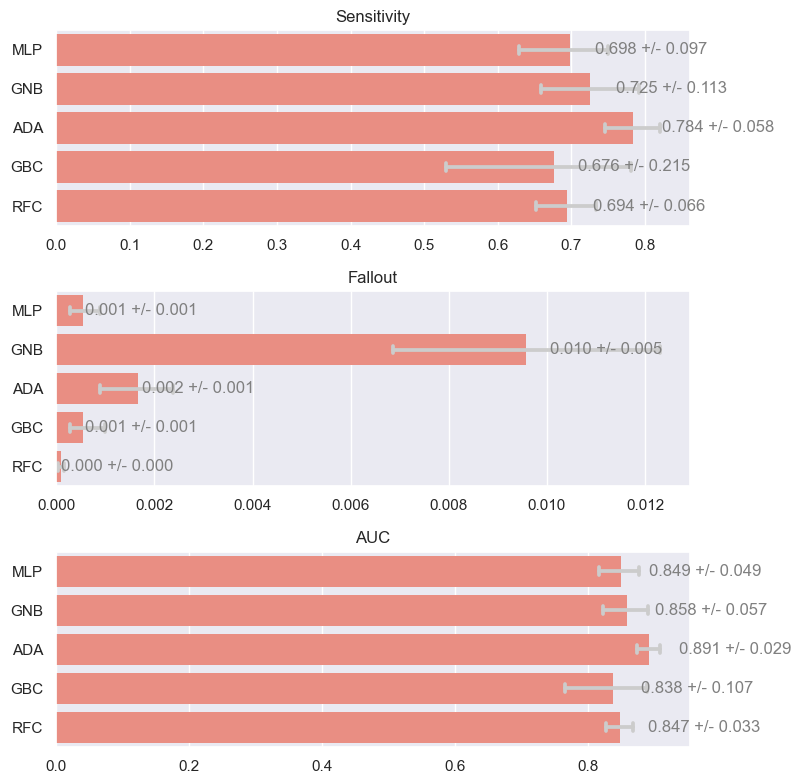

In [214]:
# save the result
# dict_score_imba_border = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

plot_algo_comparison(dict_score_imba_border)

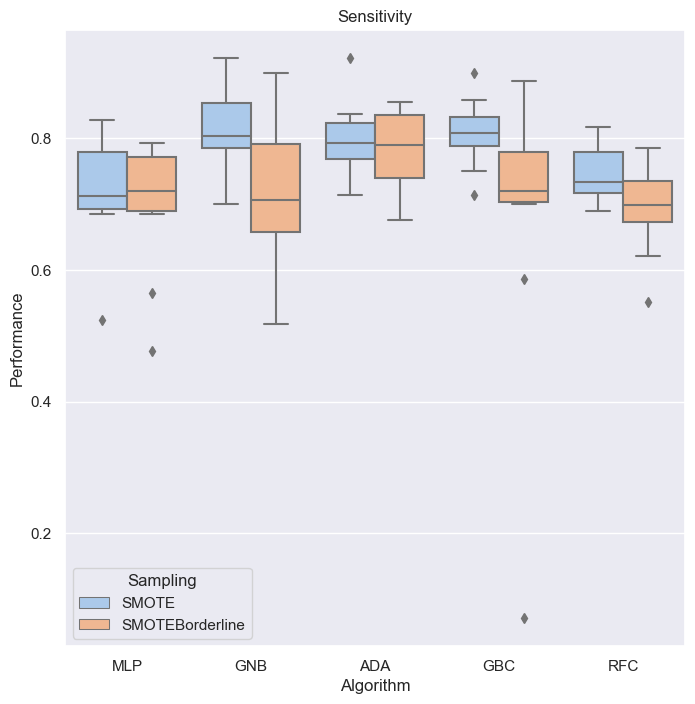

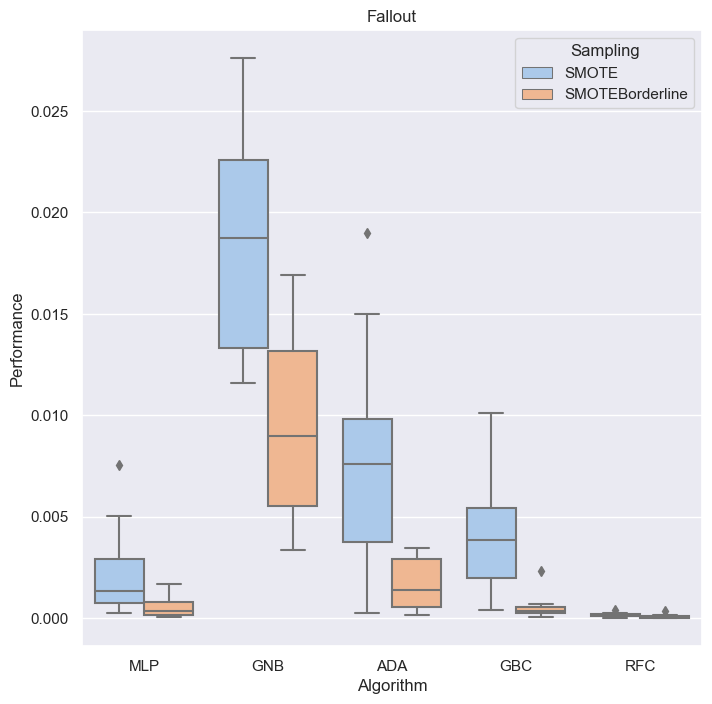

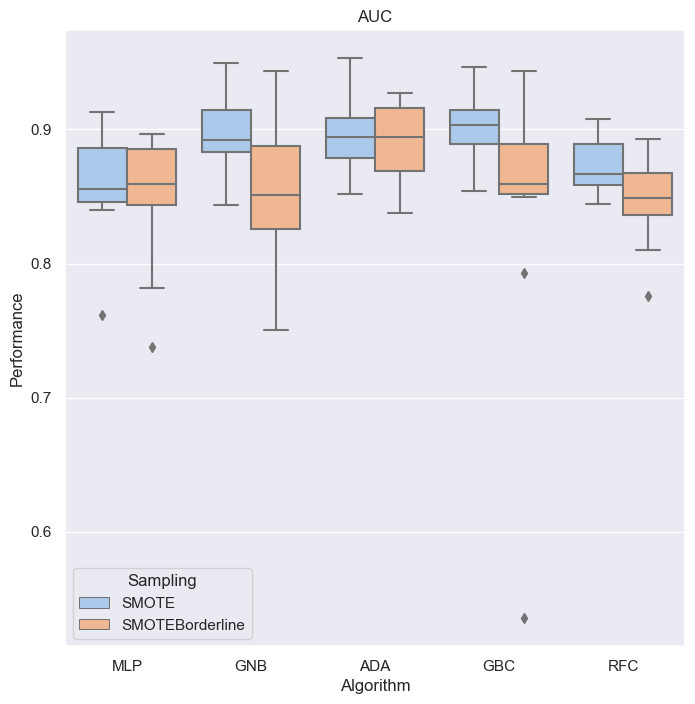

In [220]:
for metric in metrics:
    bf_af_comparison(dict_score_imba_smote, dict_score_imba_border, score=metric, bf='SMOTE', af='SMOTEBorderline')

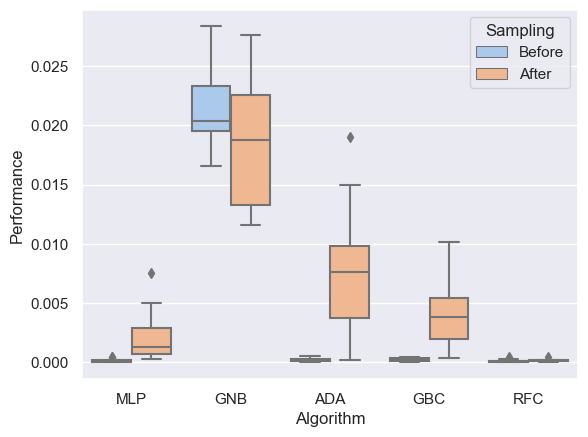

In [105]:
bf_af_comparison(dict_score_imba_bf, dict_score_imba_smote, score='Fallout')

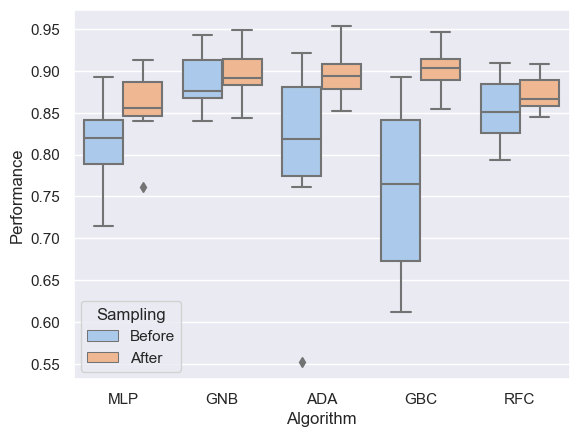

In [106]:
bf_af_comparison(dict_score_imba_bf, dict_score_imba_smote, score='AUC')

#### 2.4.2.2 ADASYN

In [122]:
%time
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)

pred_proba = np.zeros([len(X), len(algorithms)])
pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)
train_proba = np.zeros([len(X), len(algorithms)])
train_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f'Fold {i}')
    X_train_resampled, y_train_resampled = ADASYN(random_state=33).fit_resample(X[train_index], y[train_index])
    for clf_index, clf_name in enumerate(algorithms):
        
        transformer = ColumnTransformer(
                    transformers=[('power_transform', PowerTransformer(standardize=True), list_skew) ])
        model = classifiers[clf_name]
        
        
        model = classifiers[clf_name]
        
        if(clf_index<=1):
            pipeline = Pipeline([('transformer', transformer), ('model', model)])
        else:
            pipeline = Pipeline([('model', model)])
            
        pipeline.fit(X_train_resampled, y_train_resampled)
        
        train_value[train_index, clf_index:clf_index+1] = pipeline.predict(X[train_index]).reshape(-1, 1)
        train_proba[train_index, clf_index:clf_index+1] = pipeline.predict_proba(X[train_index])[:, 1].reshape(-1, 1)
        
        print(clf_name)
        
        pred_proba[[test_index], clf_index:clf_index+1] = pipeline.predict_proba(X[test_index])[:, 1].reshape(-1, 1)
        pred_value[[test_index], clf_index:clf_index+1] = pipeline.predict(X[test_index]).reshape(-1, 1)
        
        # Calculate metrics
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
        
        print(metric.sensi_score())
        print(metric.fallout_score())
        print(metric.auc_score())

pred_value_imba_adasyn = pred_value.copy()
train_value_imba_adasyn = train_value.copy()
pred_proba_imba_adasyn = pred_proba.copy()
train_proba_imba_adasyn = train_proba.copy()

        
for clf_index, clf_name in enumerate(algorithms):
    print(clf_name)
    print('\nCV sensitivity: %.3f +/- %.3f' %(np.mean(sensi_score[:,clf_index]), np.std(sensi_score[:,clf_index])))
    print('\nCV fallout: %.3f +/- %.3f' %(np.mean(fallout_score[:,clf_index]), np.std(fallout_score[:,clf_index])))
    print('\nCV auc score: %.3f +/- %.3f' %(np.mean(auc_score[:,clf_index]), np.std(auc_score[:,clf_index])))

Wall time: 0 ns
Fold 0
MLP
0.6612903225806451
0.00023229703046962716
0.8305290127750877
GNB
0.9032258064516129
0.012156877927910488
0.9455344642618513
ADA
0.8064516129032258
0.00030972937395950287
0.9030709417646332
GBC
0.7903225806451613
0.0003871617174493786
0.894967709463856
RFC
0.7741935483870968
0.00015486468697975143
0.8870193418500585
Fold 1
MLP
0.7
0.00027078256160303275
0.8498646087191984
GNB
0.725
0.012765463618428688
0.8561172681907857
ADA
0.75
0.004177788093303934
0.872911105953348
GBC
0.75
0.0009283973540675409
0.8745358013229663
RFC
0.725
0.00023209933851688522
0.8623839503307417
Fold 2
MLP
0.47619047619047616
0.0006963518898216566
0.7377470621503274
GNB
0.7857142857142857
0.013075941042206662
0.8863191723360394
ADA
0.8333333333333334
0.00270803512708422
0.9153126491031247
GBC
0.8333333333333334
0.0017021935084529382
0.9158155699124403
RFC
0.7380952380952381
0.0
0.8690476190476191
Fold 3
MLP
0.7931034482758621
0.0008120021653391076
0.8961457230552615
GNB
0.827586206896551

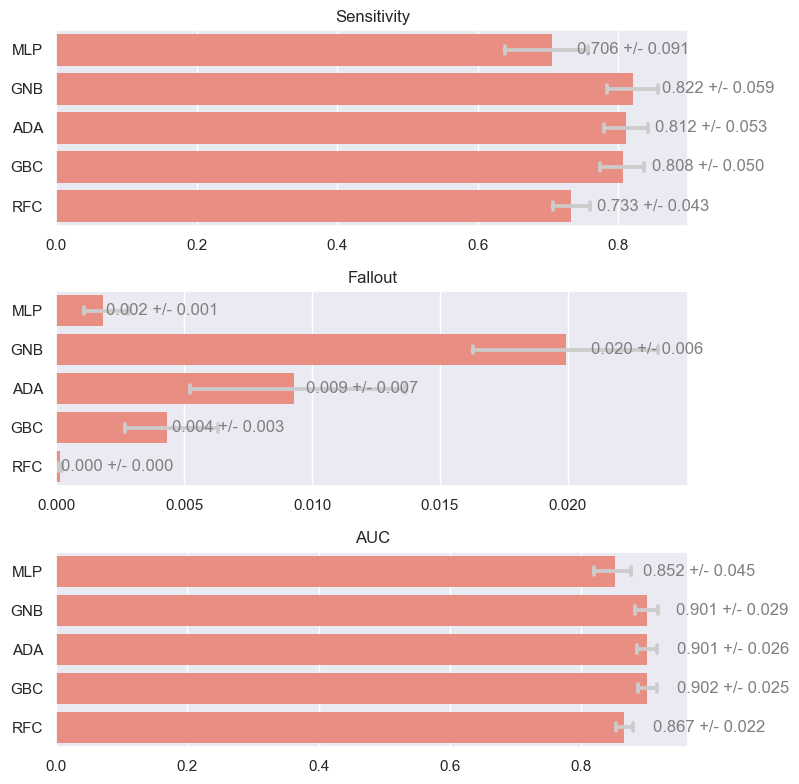

In [123]:
# save the result
dict_score_imba_adasyn = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

plot_algo_comparison(dict_score_imba_adasyn)

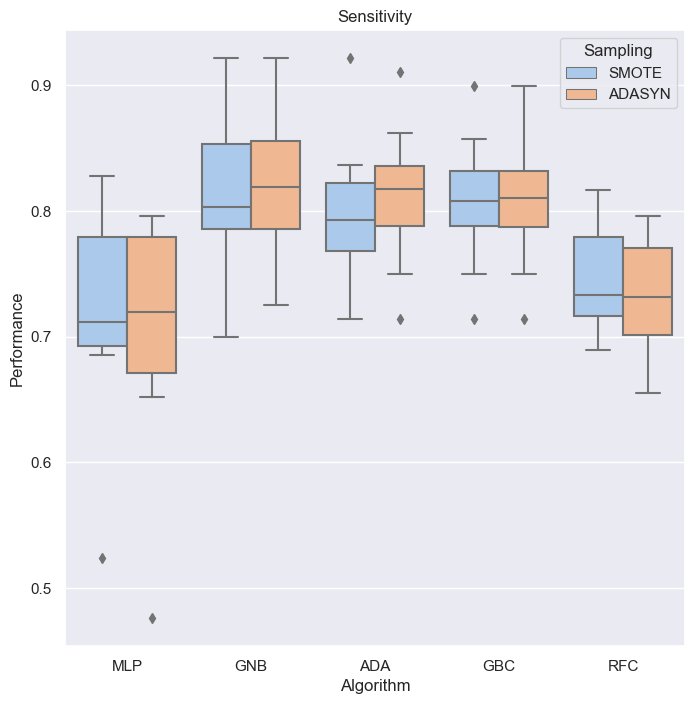

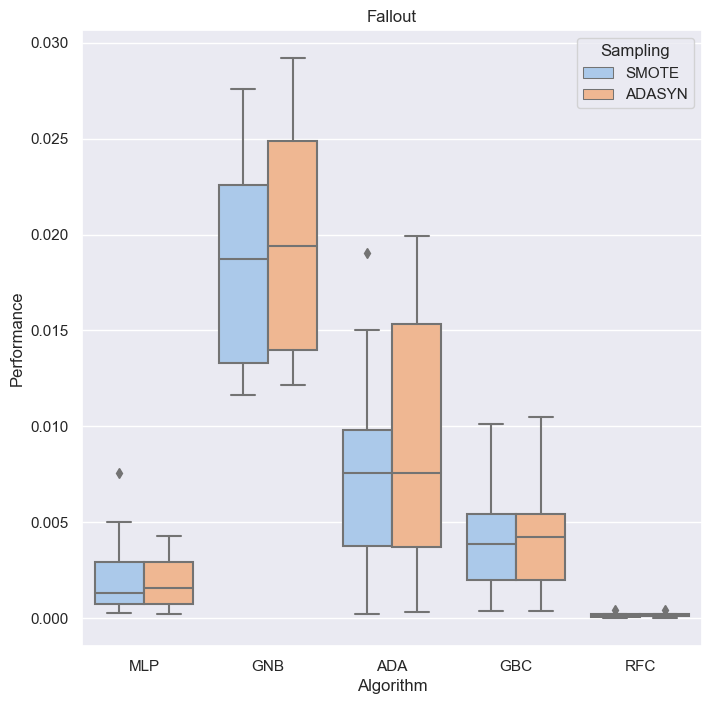

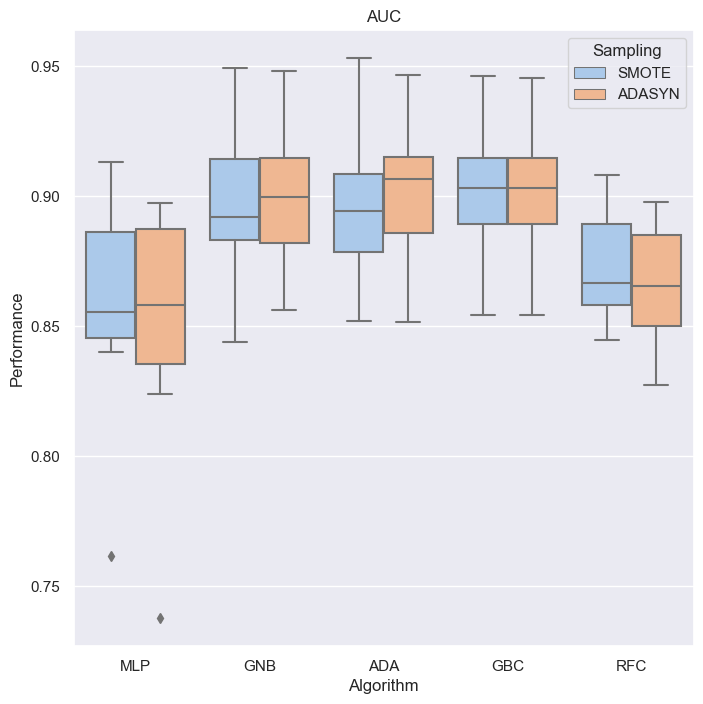

In [343]:
for metric in metrics:
    bf_af_comparison(dict_score_imba_smote, dict_score_imba_adasyn, score=metric, bf='SMOTE', af='ADASYN')

In [225]:
# pd.DataFrame(pred_value_imba_adasyn, columns=algorithms).to_csv('pred_value_imba_adasyn.csv') 
# pd.DataFrame(train_value_imba_adasyn, columns=algorithms).to_csv('train_value_imba_adasyn.csv') 
# pd.DataFrame(pred_proba_imba_adasyn, columns=algorithms).to_csv('pred_proba_imba_adasyn.csv') 
# pd.DataFrame(train_proba_imba_adasyn, columns=algorithms).to_csv('train_proba_imba_adasyn.csv') 

In [316]:
pred_value = pd.read_csv('pred_value_imba_adasyn.csv').values[:,1:]
train_value = pd.read_csv('train_value_imba_adasyn.csv').values[:,1:]
pred_proba = pd.read_csv('pred_proba_imba_adasyn.csv').values[:,1:]
train_proba = pd.read_csv('train_proba_imba_adasyn.csv').values[:,1:]
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    for clf_index, clf_name in enumerate(algorithms):
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
        
dict_score_imba_adasyn = {'Sensitivity': sensi_score.copy(), 'Fallout' : fallout_score.copy(), 'AUC' : auc_score.copy()}

## 3 Prudential Multiple Consensus Model

In [89]:
def PMC_comparison(dict_score_bf, dict_score_af, score='AUC', hue="Model", bf="Single Algorithm", af="PMC model"):
    
    # Create DataFrame for bf data
    df_bf = pd.DataFrame(dict_score_bf[score], columns=classifiers.keys())
    df_bf.reset_index(inplace=True)
    df_bf.rename(columns={"index": "Fold"}, inplace=True)
    df_bf.Fold +=1
    df_bf[hue] = bf
    
    # Create DataFrame for PMC data
    df_af = pd.DataFrame(dict_score_PMC[score])
    df_af.reset_index(inplace=True)
    df_af.rename(columns={"index": "Fold"}, inplace=True)
    df_af.Fold +=1
    df_af= df_af.drop(0, axis=1)
    for i in classifiers.keys():
        df_af[i] = dict_score_PMC[score]
    df_af[hue] = af

    # Merge two DataFrame
    merged_df = pd.concat([df_bf, df_af])
    
    # Unpivot Data by each Fold and Sampling
    melted_df = pd.melt(merged_df, id_vars=['Fold', hue], var_name='Algorithm', value_name='Performance')
    
    #Plot boxplot for comparison
    fig_score, axes_score = plt.subplots(figsize=(8,8), nrows=1, ncols=1)
    sns.boxplot(x='Algorithm', y='Performance', hue=hue, data=melted_df, palette="pastel", ax=axes_score)
    axes_score.set_title(score)

## 3.1 Determine the optimal combination

**Original Prudential Multiple Consensus Model**

In [ ]:
# # Original Prudential Multiple Consensus Model
# test_txn = X_test[0].reshape(1,-1)

# def sigmoid_function(p):
#   return 1 / (1 + np.exp(-p)) 

# def PMC_model(algorithms, X_train, y_train, X_test):
  
#   # Step 1: Fit classification algorithms
#   for clf_name in algorithms:
#     classifiers[clf_name].fit(X_train, y_train)


#   # Step 2: Make the prediction and take the probability
#   pred_proba = np.zeros([len(X_test), len(algorithms)])
#   pred_value = np.zeros([len(X_test), len(algorithms)])

#   for clf_index, clf_name in enumerate(algorithms):
#     pred_proba[:, clf_index:clf_index+1] = classifiers[clf_name].predict_proba(X_test)[:, :1]
#     pred_value[:, clf_index:clf_index+1] = classifiers[clf_name].predict(X_test).reshape(-1, 1)


#   # Step 3: Calculate sigmoid mean of prediction
#   proba_mean = np.array([sigmoid_function(np.mean(pred_proba[i, :])) for i in range(len(X_test))])
  

#   # Step 4: Use majority vote for classification
#   w1 = np.zeros(len(X_test))
#   w2 = np.zeros(len(X_test))
#   result = np.zeros(len(X_test))

#   for i in range(len(X_test)):
#     for j in range(len(algorithms)):
#       if pred_value[i][j] == 0 and pred_proba[i][j] > proba_mean[i]:
#         w1[i] += 1 
#       else:
#         w2[i] += 1

#     if w1[i] < w2[i]:
#       result[i] += 1 

#   return result

In [199]:
from itertools import combinations
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def PMC_model(algorithms, X_train, y_train, X_test, n_comb=5):
  
  comb = list(combinations(range(len(algorithms)), n_comb))
  result = np.zeros([len(X_test), len(comb)], dtype = np.int32)
    
  for comb_index, algo_index in enumerate(comb):
      algo_value = [algorithms[i] for i in algo_index]
      # print(algo_value)
    
      # Step 3: Calculate sigmoid mean of prediction
      proba = 1-pred_proba
      proba_mean = np.array([np.mean(proba[test_index[0]+i, algo_index]) for i in range(len(X_test))])

      # Step 4: Use majority vote for classification
      w1 = np.zeros(len(X), dtype = np.int32)
      w2 = np.zeros(len(X), dtype = np.int32)

      for i in range(len(X_test)):
        for j in algo_index:
          if (pred_value[i+test_index[0],j] == 0) and (proba[i+test_index[0],j] > proba_mean[i]):
            w1[i] += 1 
          else:
            w2[i] += 1

        if w1[i] < w2[i]:
          result[i,comb_index] += 1 

  return result

**Prudential Multiple Consensus Model (Run)**

In [274]:
from itertools import combinations

n_comb = 3
comb = list(combinations(range(len(algorithms)), n_comb))
algo_triples = []
Sensitivity = []
Fallout = [] 
AUC = []

pred_value_PMC  = np.zeros([len(y),len(list(comb))])
sensi_score_PMC = np.zeros([10, len(list(comb))])
fallout_score_PMC = np.zeros([10, len(list(comb))])
auc_score_PMC = np.zeros([10, len(list(comb))])


for i, (train_index, test_index) in enumerate(tscv.split(X)):
    pred_value_PMC[test_index] = PMC_model(algorithms[:], X[train_index], y[train_index], X[test_index], n_comb=n_comb)
    
    for comb_index, algo_index in enumerate(comb): 
        metric = metric_score(y[test_index], pred_value_PMC[test_index, comb_index])
        sensi_score_PMC[i,comb_index] = metric.sensi_score()
        fallout_score_PMC[i,comb_index] = metric.fallout_score()
        auc_score_PMC[i,comb_index] = metric.auc_score()

for comb_index, algo_index in enumerate(comb):
    algo_value = [algorithms[i] for i in algo_index]
    algo_triples.append(', '.join(algo_value))
    Sensitivity.append(round(np.mean(sensi_score_PMC[:,comb_index]),3))
    Fallout.append(round(np.mean(fallout_score_PMC[:,comb_index]),3))
    AUC.append(round(np.mean(auc_score_PMC[:,comb_index]),3))

df_algo_triples = pd.DataFrame(zip(algo_triples, Sensitivity, Fallout, AUC), columns=['Algorithm by triples', 'Sensitivity','Fallout','AUC'])  

In [430]:
df_algo_triples.to_csv('df_algo_triples.csv')

In [277]:
dict_score_PMC = {'Sensitivity': sensi_score_PMC[:,3].copy(), 'Fallout' : fallout_score_PMC[:,3].copy(), 'AUC' : auc_score_PMC[:,3].copy()}

In [273]:
from itertools import combinations

n_comb = 4
comb = list(combinations(range(len(algorithms)), n_comb))
algo_quadruples = []
Sensitivity = []
Fallout = [] 
AUC = []

pred_value_PMC  = np.zeros([len(y),len(list(comb))])
sensi_score_PMC = np.zeros([10, len(list(comb))])
fallout_score_PMC = np.zeros([10, len(list(comb))])
auc_score_PMC = np.zeros([10, len(list(comb))])


for i, (train_index, test_index) in enumerate(tscv.split(X)):
    pred_value_PMC[test_index] = PMC_model(algorithms[:], X[train_index], y[train_index], X[test_index], n_comb=n_comb)
    
    for comb_index, algo_index in enumerate(comb): 
        metric = metric_score(y[test_index], pred_value_PMC[test_index, comb_index])
        sensi_score_PMC[i,comb_index] = metric.sensi_score()
        fallout_score_PMC[i,comb_index] = metric.fallout_score()
        auc_score_PMC[i,comb_index] = metric.auc_score()

for comb_index, algo_index in enumerate(comb):
    algo_value = [algorithms[i] for i in algo_index]
    algo_quadruples.append(', '.join(algo_value))
    Sensitivity.append(round(np.mean(sensi_score_PMC[:,comb_index]),3))
    Fallout.append(round(np.mean(fallout_score_PMC[:,comb_index]),3))
    AUC.append(round(np.mean(auc_score_PMC[:,comb_index]),3))

df_algo_quadruples = pd.DataFrame(zip(algo_quadruples, Sensitivity, Fallout, AUC), columns=['Algorithm by quadruples', 'Sensitivity','Fallout','AUC'])
df_algo_quadruples

,Algorithm by quadruples,Sensitivity,Fallout,AUC
0,"MLP, GNB, ADA, GBC",0.798,0.001,0.898
1,"MLP, GNB, ADA, RFC",0.764,0.000,0.882
2,"MLP, GNB, GBC, RFC",0.761,0.001,0.880
3,"MLP, ADA, GBC, RFC",0.761,0.001,0.880
4,"GNB, ADA, GBC, RFC",0.789,0.001,0.894


In [432]:
df_algo_quadruples.to_csv('df_algo_quadruples.csv')

In [270]:
from itertools import combinations

n_comb = 5
comb = list(combinations(range(len(algorithms)), n_comb))
algo_all = []
Sensitivity = []
Fallout = [] 
AUC = []

pred_value_PMC  = np.zeros([len(y),len(list(comb))])
sensi_score_PMC = np.zeros([10, len(list(comb))])
fallout_score_PMC = np.zeros([10, len(list(comb))])
auc_score_PMC = np.zeros([10, len(list(comb))])


for i, (train_index, test_index) in enumerate(tscv.split(X)):
    pred_value_PMC[test_index] = PMC_model(algorithms[:], X[train_index], y[train_index], X[test_index], n_comb=n_comb)
    
    for comb_index, algo_index in enumerate(comb): 
        metric = metric_score(y[test_index], pred_value_PMC[test_index, comb_index])
        sensi_score_PMC[i,comb_index] = metric.sensi_score()
        fallout_score_PMC[i,comb_index] = metric.fallout_score()
        auc_score_PMC[i,comb_index] = metric.auc_score()

for comb_index, algo_index in enumerate(comb):
    algo_value = [algorithms[i] for i in algo_index]
    print(algo_value)
    algo_all.append(', '.join(algo_value))
    Sensitivity.append(round(np.mean(sensi_score_PMC[:,comb_index]),3))
    Fallout.append(round(np.mean(fallout_score_PMC[:,comb_index]),3))
    AUC.append(round(np.mean(auc_score_PMC[:,comb_index]),3))

df_algo_all = pd.DataFrame(zip(algo_all, Sensitivity, Fallout, AUC), columns=['Algorithms', 'Sensitivity','Fallout','AUC'])
df_algo_all

['MLP', 'GNB', 'ADA', 'GBC', 'RFC']


,Algorithms,Sensitivity,Fallout,AUC
0,"MLP, GNB, ADA, GBC, RFC",0.81,0.002,0.904


In [105]:
dict_score_PMC = {'Sensitivity': sensi_score_PMC.copy(), 'Fallout' : fallout_score_PMC.copy(), 'AUC' : auc_score_PMC.copy()}

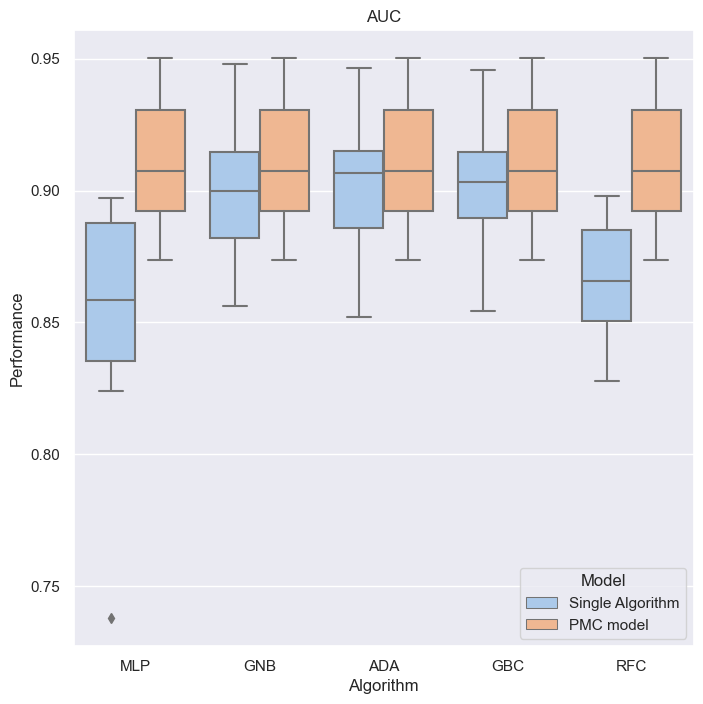

In [281]:
PMC_comparison(dict_score_imba_adasyn, dict_score_PMC, score='AUC')

In [436]:
pd.DataFrame(dict_score_PMC,columns=metrics).to_csv('dict_score_PMC.csv')

## 3.1 Model Calibration

In [286]:
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss, log_loss

In [287]:
def plot_reli_diagram(y_proba):

    num_algo = len(algorithms)
    fig_cali, axes_cali = plt.subplots(figsize=(10,13), nrows=num_algo, ncols=1)

    for algo_index, algo_name in enumerate(algorithms):
        fig_cali.tight_layout()
        prob_true, prob_pred  = calibration_curve(y[25897:], y_proba[25897:,algo_index], n_bins=100, )
        axes_cali[algo_index].plot([0, 1], [0, 1], linestyle='--')
        axes_cali[algo_index].plot(prob_true, 1-prob_pred, marker='o' )
        axes_cali[algo_index].set_title(f'{algo_name} Reliability Diagram')
        axes_cali[algo_index].legend(labels=['Perfect',algo_name], loc=0)
        axes_cali[algo_index].set_xlabel('Predictive Probability')
        axes_cali[algo_index].set_ylabel('True Probability')

In [303]:
sample_weight = [1000 if i == 1 else 1 for i in y[25897:]]

In [304]:
def calibration_metric_calc(pred_proba):
    
    list_brier_score = []
    list_log_loss = []
    
    
    for algo_index, algo_name in enumerate(algorithms):
        
        list_brier_score.append(brier_score_loss(y[25897:], pred_proba[25897:,algo_index], sample_weight=sample_weight))
        list_log_loss.append(brier_score_loss(y[25897:], pred_proba[25897:,algo_index],sample_weight=sample_weight))
    
    cali_metric = {'Algorithm' : algorithms,'Brier score loss' : list_brier_score, 'Log loss' : list_log_loss}
    df_calibration_metric = pd.DataFrame(cali_metric)
    
    return df_calibration_metric

### 3.1.1 Before Model Calibration

In [284]:
# pred_proba
# plot_reli_diagram(train_proba_imba_adasyn)

In [305]:
df_before_calibration = calibration_metric_calc(pred_proba)
df_before_calibration

,Algorithm,Brier score loss,Log loss
0,MLP,0.180089,0.180089
1,GNB,0.103518,0.103518
2,ADA,0.205018,0.205018
3,GBC,0.094941,0.094941
4,RFC,0.135249,0.135249


### 3.1.2 After Model Calibration

**Sigmoid function** 

In [307]:
pred_proba_cali_sigmoid = np.zeros(pred_proba.shape)
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import ADASYN

tscv = TimeSeriesSplit(n_splits=10, max_train_size=None, test_size=None, gap=0)

pred_proba = np.zeros([len(X), len(algorithms)])
pred_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)
train_proba = np.zeros([len(X), len(algorithms)])
train_value = np.zeros([len(X), len(algorithms)], dtype = np.int32)

for i, (train_index, test_index) in enumerate(tscv.split(X)):
    print(f'Fold {i}')
    X_train_resampled, y_train_resampled = ADASYN(random_state=33).fit_resample(X[train_index], y[train_index])
    for clf_index, clf_name in enumerate(algorithms):
        
        transformer = ColumnTransformer(
                    transformers=[('power_transform', PowerTransformer(standardize=True), list_skew) ])
        model = classifiers[clf_name]
        
        
        model = classifiers[clf_name]
        
        if(clf_index<=1):
            pipeline = Pipeline([('transformer', transformer), ('model', model)])
        else:
            pipeline = Pipeline([('model', model)])
        
        cali = CalibratedClassifierCV(pipeline, method='sigmoid', cv=2)
        cali.fit(X_train_resampled, y_train_resampled)
            
        train_value[train_index, clf_index:clf_index+1] = cali.predict(X[train_index]).reshape(-1, 1)
        train_proba[train_index, clf_index:clf_index+1] = cali.predict_proba(X[train_index])[:, 1].reshape(-1, 1)
        
        print(clf_name)
        
        pred_proba[[test_index], clf_index:clf_index+1] = cali.predict_proba(X[test_index])[:, 1].reshape(-1, 1)
        pred_value[[test_index], clf_index:clf_index+1] = cali.predict(X[test_index]).reshape(-1, 1)
        
        # Calculate metrics
        metric = metric_score(y[test_index], pred_value[test_index, clf_index])
        sensi_score[i, clf_index] = metric.sensi_score()
        fallout_score[i, clf_index] = metric.fallout_score()
        auc_score[i, clf_index] = metric.auc_score()
        
        print(metric.sensi_score())
        print(metric.fallout_score())
        print(metric.auc_score())

pred_value_cali_sigmoid = pred_value.copy()
train_value_cali_sigmoid = train_value.copy()
pred_proba_cali_sigmoid = pred_proba.copy()
train_proba_imba_sigmoid = train_proba.copy()


for clf_index, clf_name in enumerate(algorithms):
    print(clf_name)
    print('\nCV sensitivity: %.3f +/- %.3f' %(np.mean(sensi_score[:,clf_index]), np.std(sensi_score[:,clf_index])))
    print('\nCV fallout: %.3f +/- %.3f' %(np.mean(fallout_score[:,clf_index]), np.std(fallout_score[:,clf_index])))
    print('\nCV auc score: %.3f +/- %.3f' %(np.mean(auc_score[:,clf_index]), np.std(auc_score[:,clf_index])))

Fold 0
MLP
0.7903225806451613
0.0015873630415424523
0.8943676088018094
GNB
0.9193548387096774
0.012389174958380116
0.9534828318756486
ADA
0.8064516129032258
0.00030972937395950287
0.9030709417646332
GBC
0.6935483870967742
0.00042587788919431645
0.84656125460379
RFC
0.9032258064516129
0.0001935808587246893
0.9515161127964441
Fold 1
MLP
0.7
0.0010444470233259835
0.849477776488337
GNB
0.725
0.01508645700359754
0.8549567714982013
ADA
0.575
0.0
0.7875
GBC
0.725
0.0001934161154307377
0.8624032919422846
RFC
0.725
0.00023209933851688522
0.8623839503307417
Fold 2
MLP
0.6190476190476191
0.0017795659406553445
0.8086340265534819
GNB
0.7857142857142857
0.015164996711671631
0.885274644501307
ADA
0.8333333333333334
0.018066462919261866
0.9076334352070359
GBC
0.8333333333333334
0.004874463228751596
0.9142294350522909
RFC
0.8333333333333334
0.000270803512708422
0.9165312649103126
Fold 3
MLP
0.8275862068965517
0.0029386745031320083
0.9123237661967099
GNB
0.8275862068965517
0.019836052896141057
0.9038750

In [308]:
pred_proba_cali_sigmoid

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.09902059, 0.11111479, 0.13415686, 0.00162405, 0.04713649],
       [0.09907797, 0.11111442, 0.16081485, 0.02075754, 0.0062801 ],
       [0.65611608, 0.11111387, 0.24358388, 0.01436595, 0.01897313]])

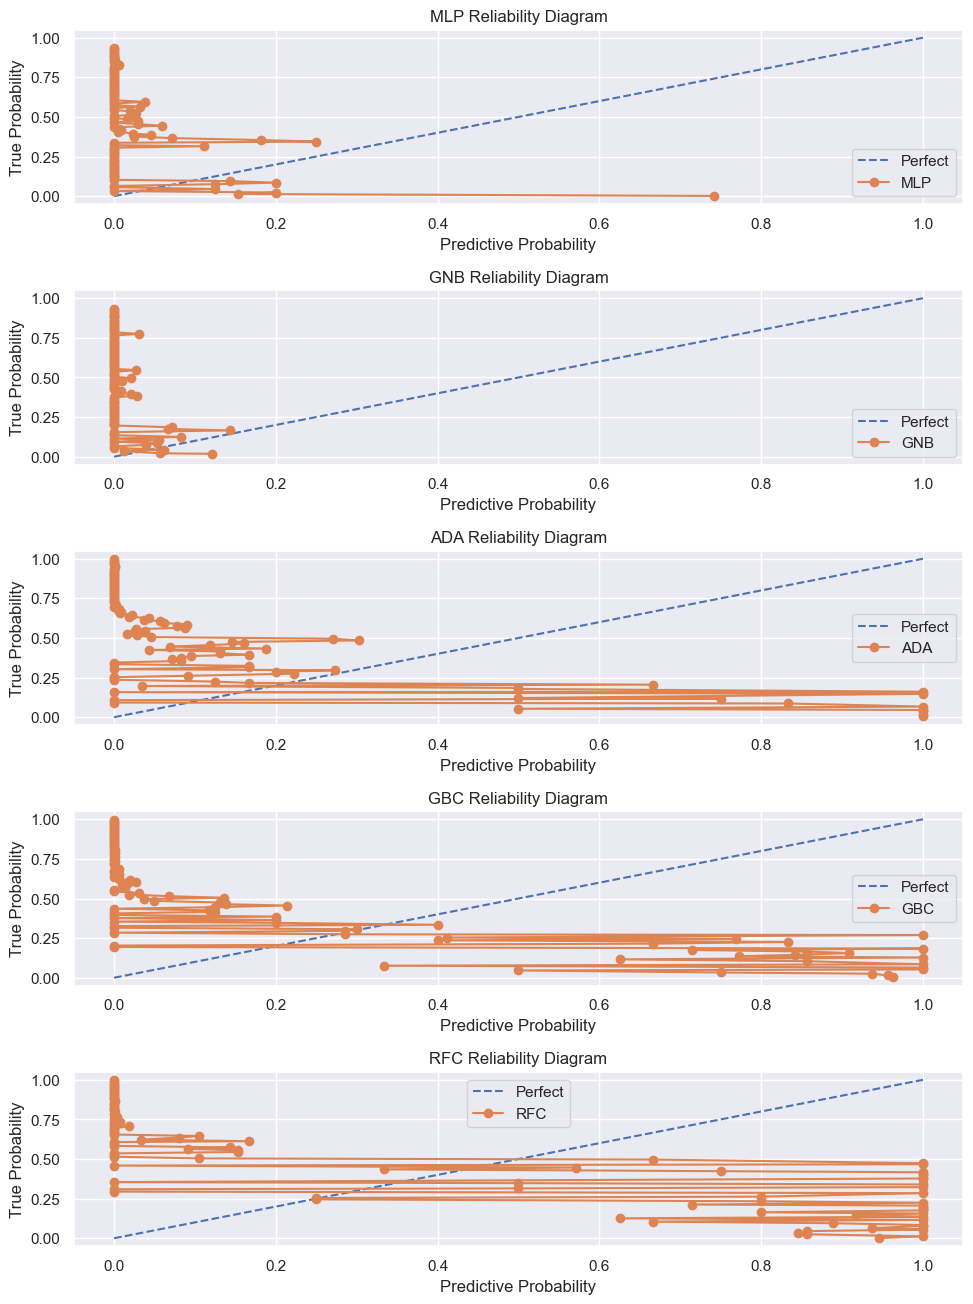

In [311]:
plot_reli_diagram(pred_proba_cali_sigmoid)

In [313]:
df_after_calibration_sigmoid = calibration_metric_calc(pred_proba_cali_sigmoid)
df_after_calibration_sigmoid

,Algorithm,Brier score loss,Log loss
0,MLP,0.126105,0.126105
1,GNB,0.086358,0.086358
2,ADA,0.210887,0.210887
3,GBC,0.115625,0.115625
4,RFC,0.137220,0.137220


In [ ]:
df_compare = df_after_calibration_sigmoid.copy()

df_compare['Brier score loss before'] = df_before_calibration['Brier score loss']
df_compare['Log loss before'] = df_before_calibration['Log loss']

df_compare = df_compare.reindex(columns=['Algorithm', 'Brier score loss before', 'Brier score loss', 'Log loss before', 'Log loss'])
df_compare.rename(columns = {'Brier score loss':'Brier score loss after', 'Log loss':'Log loss after'}, inplace = True)
df_compare

In [ ]:
plot_reli_diagram(pred_proba_cali_sigmoid)


**Isotonic function**

In [ ]:
pred_proba_cali_iso = np.zeros(pred_proba.shape)

for clf_index, clf_value in enumerate(classifiers.values()):
    
    cali = CalibratedClassifierCV(clf_value, method='isotonic', cv=5)
    cali.fit(X_train, y_train)
    
    # predict probabilities
    pred_proba_cali_iso[:,clf_index] = cali.predict_proba(X_test)[:, 1]

In [ ]:
plot_reli_diagram(pred_proba_cali_iso)

In [ ]:
df_after_calibration_iso = calibration_metric_calc(pred_proba_cali_iso)
df_after_calibration_iso

In [ ]:
df_compare = df_after_calibration_sigmoid.copy()

df_compare['Brier score loss iso'] = df_after_calibration_iso['Brier score loss']
df_compare['Log loss iso'] = df_after_calibration_iso['Log loss']

df_compare = df_compare.reindex(columns=['Algorithm', 'Brier score loss', 'Brier score loss iso', 'Log loss', 'Log loss iso'])
df_compare.rename(columns = {'Brier score loss':'Brier score loss sigmoid', 'Log loss':'Log loss sigmoid'}, inplace = True)
df_compare

In [ ]:
df_compare.iloc[:, 1:].mean()

In [ ]:
pred_proba = pred_proba_cali_sigmoid

## 3.3 Ensemble Models Comparison

#### Complete Agreement approach


In [364]:
def CompletementAgreement(algorithms, X_train, y_train, X_test):
  
  # Step 4: Use majority vote for classification
  w1 = np.zeros(len(X_test), dtype = np.int32)
  result = np.zeros(len(X_test), dtype = np.int32)

  for i in range(len(X_test)):
    for j in range(len(algorithms)):
        if pred_value[i+test_index[0], j] == 1:
            w1[i] += 1 
    if w1[i] == 5:
        result[i] = 1 

  return result

#### Majority Vote Approach

In [369]:
def MajorityVoting(algorithms, X_train, y_train, X_test):
  
  w1 = np.zeros(len(X_test), dtype = np.int32)
  w2 = np.zeros(len(X_test), dtype = np.int32)
  result = np.zeros(len(X_test), dtype = np.int32)

  for i in range(len(X_test)):
    for j in range(len(algorithms)):
      if pred_value[i+test_index[0],j] == 0:
        w1[i] += 1 
      else:
        w2[i] += 1

    if w1[i] < w2[i]:
      result[i] = 1 

  return result

#### Weighted Voting Approach

In [351]:
from sklearn.metrics import accuracy_score


def WeightedVoting(algorithms, X_train, y_train, X_test):
  
  # Step 3: Define weight for each algorithm
  weighted = np.array([np.log(1-pred_proba[i+test_index[0], :])/ np.log(pred_proba[i+test_index[0], :]) for i in range(len(X_test))])


  # Step 4: Use majority vote for classification
  w1 = np.zeros(len(X_test), dtype = np.float64)
  w2 = np.zeros(len(X_test), dtype = np.float64)
  result = np.zeros(len(X_test), dtype = np.int32)

  for i in range(len(X_test)):
    for j in range(len(algorithms)):
      if pred_value[i+test_index[0]][j] == 0: 
        
        w1[i] += weighted[i, j]
      else:
        w2[i] += weighted[i, j]

    if w1[i] > w2[i]:
      result[i] = 0 
    else:
      result[i] = 1

  return result

#### Classifier Selection Approach

In [366]:
from sklearn.neighbors import NearestNeighbors
k = 5

def ClassifierSelection(algorithms, X_train, y_train, X_test, k=5):


  # Step 2: Find the k nearest neighbors for each data point
  neigh = NearestNeighbors(n_neighbors=k, metric='euclidean')
  neigh.fit(X_train)


  # Step 4: Iteriate through each data point
  clf_selected = np.zeros([k, len(algorithms)]) 
  result = np.zeros(len(X_test))

  for i in range(len(X_test)):
    # Get the indices of the k nearest neighbors
    neighbors = neigh.kneighbors([X_test[i]], return_distance=False)[0]

    for index_neighbor, neighbor in enumerate(neighbors):
      clf_selected[index_neighbor, :] = list(map(int, train_value[index_neighbor, :] == y_train[neighbor]))

    count_selected = clf_selected.sum(axis =0)
    index_selected = np.argmax(count_selected)
    result[i] = pred_value[i+test_index[0], index_selected]

  return result

#### Relational Approach

In [342]:
from itertools import combinations 


def PairwiseAccuracy(algorithms, X_train, y_train, X_test, labels = 2):
  
  # Step 1: Create all possible pairs of classifiers:
  algo_comb = list(combinations(np.arange(len(algorithms)), 2))


  # Step 2: Initialize set U for both correctly and incorrectly classify instances
  U = np.zeros( [len(algorithms), len(X_train)] , dtype = np.int32)
  for clf in range(len(algorithms)):
    U[clf, :] = np.array((train_value[train_index, clf] == y_train), dtype = np.int32)
  print(U)


  # Step 3: Initialize subset I and Ie for correctly and incorrectly classify instances, respectively
  I = [[] for i in range(len(algorithms))]
  Ie = [[] for i in range(len(algorithms))]

  for clf_index, clf_value in enumerate(U):
    for index, value in enumerate(clf_value):
      if value == 1:
        I[clf_index].append(index)
      else:
        Ie[clf_index].append(index)
  # print(I, Ie)


  # Step 4: Calculate shared accuracy and Shared Mistake 
  S_acc = np.zeros(len(algo_comb))
  S_err = np.zeros(len(algo_comb))

  for index, (ci, cj) in enumerate(algo_comb):
    S_acc[index] = len(list((set(I[ci]) & set(I[cj])))) / len(X_train)
    S_err[index] = len(list((set(Ie[ci]) & set(Ie[cj])))) / len(X_train)
  # print(S_acc, S_err)


  # Step 5: Calculate accuracy of each algorithm
  acc = np.zeros(len(algorithms))

  for ci in range(len(algorithms)):
    acc[ci] = len(I[ci]) / len(X_train)


  # Step 6: Calculate weight for each label and make prediction
  labels = 2
  v = np.zeros([len(X_test), labels])
  result = np.zeros(len(X_test))

  for i in range(len(X_test)):
    for pair, (ci, cj) in enumerate(algo_comb):
        v[i, pred_value[i+test_index[0], ci]] += S_acc[pair] - S_err[pair] if pred_value[i+test_index[0], ci] == pred_value[i+test_index[0], cj] else acc[ci] - S_acc[pair]
        v[i, pred_value[i+test_index[0], cj]] += acc[cj] - S_acc[pair] if  pred_value[i+test_index[0], ci] != pred_value[i+test_index[0], cj] else 0
  print(v)
  result = np.argmax(v, axis=1)
  return result


#### Store the all the approaches

In [381]:
from sklearn.ensemble import VotingClassifier

ensemble_model =["Complete Agreement", "Majority Voting", "Weighted Voting", "Classifier Selection", "Pairwise Accuracy"]

estimator = []
for clf_name in algorithms:
   estimator.append(tuple([clf_name,classifiers[clf_name]]))
   
ensemble_classifiers = {
  "Complete Agreement": CompletementAgreement,
  "Majority Voting": MajorityVote,
  "Weighted Voting": WeightedVoting,
  "Classifier Selection": ClassifierSelection,
  "Pairwise Accuracy": PairwiseAccuracy,
    }

In [378]:
ensemble_sensitivity = []
ensemble_fallout =[]
ensemble_auc = []

In [367]:
ensemble_sensitivity = []
ensemble_fallout =[]
ensemble_auc = []

pred_value_major  = np.zeros(len(y))
sensi_score_major = np.zeros(10)
fallout_score_major = np.zeros(10)
auc_score_major = np.zeros(10)
for ensemble in ensemble_model:
    for i, (train_index, test_index) in enumerate(tscv.split(X)):
        pred_value_major[test_index] = ensemble_classifiers[ensemble](algorithms, X[train_index], y[train_index], X[test_index])
        metric = metric_score(y[test_index], pred_value_major[test_index])
        sensi_score_major[i] = metric.sensi_score()
        fallout_score_major[i] = metric.fallout_score()
        auc_score_major[i] = metric.auc_score()

    print('\nCV auc score: %.3f +/- %.3f' %(np.mean(auc_score_major), np.std(auc_score_major)))


CV auc score: 0.852 +/- 0.045


In [419]:
ensemble_sensitivity.append(dict_score_PMC["Sensitivity"].mean())
ensemble_fallout.append(dict_score_PMC["Fallout"].mean())
ensemble_auc.append(dict_score_PMC["AUC"].mean())

In [429]:
dict_score_ensemble = {"Sensitivity":ensemble_sensitivity, "Fallout":ensemble_fallout, "AUC":ensemble_auc}
df_score_ensemble = pd.DataFrame(dict_score_ensemble, index=ensemble_model, columns=metrics)
df_score_ensemble = round(df_score_ensemble,3)
df_score_ensemble

,Sensitivity,Fallout,AUC
Complete Agreement,0.549,0.000,0.830
Majority Voting,0.800,0.001,0.899
Weighted Voting,0.800,0.024,0.762
Classifier Selection,0.706,0.002,0.852
Pairwise Accuracy,0.800,0.001,0.899
PMC model,0.833,0.014,0.909


In [ ]:
# # sigmoid fuction

# def sigmoid_function(p):
#   return 1 / (1 + np.exp(-p)) 

# algorithms =["MLP", "GNB", "ADA", "GBC", "RFC"]


# classifiers = {
#     "MLP": MLPClassifier(),
#     "GNB": GaussianNB(),
#     "ADA": AdaBoostClassifier(),
#     "GBC": GradientBoostingClassifier(),
#     "RFC": RandomForestClassifier()
#     }
# test_txn = X_test[0].reshape(1,-1)
# # test_txn = X_test

# # Step 1: Fit classification algorithms
# for clf_name in algorithms:
#     classifiers[clf_name].fit(X_train, y_train)

# # Step 2: Make the prediction and take the probability
# pred_proba = []
# pred_value = []

# for clf_name in algorithms:
#   pred_proba.append(classifiers[clf_name].predict_proba(test_txn)[:,0])
#   pred_value.append(classifiers[clf_name].predict(test_txn))


# predictions = zip(pred_proba, pred_value)

# # Step 3: Calculate sigmoid mean of prediction
# proba_mean = sigmoid_function(np.mean(pred_proba))

# # Step 4: Use majority vote for classification
# w1 = 0
# w2 = 0

# for i, (proba, value) in enumerate(predictions):
#   if value == 0 and proba > proba_mean:
#     w1 += 1 
#   else:
#     w2 += 1

# if w1 > w2:
#   result = 0
# else: 
#   result = 1 

# print(result)


### 2.2.1 Single algorithm predict

In [ ]:
y_single_pred = {}

for clf_name in algorithms:
  y_single_pred[clf_name] = classifiers[clf_name].predict(X_test)

print(y_single_pred)

### 2.1.2 PMC model predict

In [ ]:
y_PMC_pred = np.zeros(len(X_test))

y_PMC_pred = PMC_model(algorithms, X_train, y_train, X_test)
print(y_PMC_pred)

### 2.1.3 Ensemble model predict

In [ ]:
y_ensemble_pred = {}

for eclf_name in ensemble_model:
  y_ensemble_pred[eclf_name] = ensemble_classifiers[eclf_name](algorithms, X_train, y_train, X_test)
  
print(y_ensemble_pred)  

### 2.1.3 Other algorithm predict

In [ ]:
# from sklearn.model_selection import cross_val_score

# y_algo_pred = bag.predict(X_test)
# y_algo_pred 

## 3.1 Model Evaluation

### 3.1.1 Single Algorithm Evaluation

### 3.1.2 PMC model evaluation

In [ ]:
cm_PMC = confusion_matrix(y_test, y_PMC_pred)
print("PMC model")
print(cm_PMC)
print("sensitivity = ",sensitivity(cm_PMC))
print("fallout = " ,fallout(cm_PMC))
print("specificity = " ,specificity(cm_PMC))
print("miss_rate = " ,miss_rate(cm_PMC))
fpr, tpr, thresholds  = roc_curve(y_test, y_PMC_pred)
print("AUC = ",auc(fpr, tpr))

### 3.1.3 Ensemble model evaluation

In [ ]:
cm_ensemble = {}

for eclf_name in ensemble_model:
  cm_ensemble[eclf_name] = confusion_matrix(y_test, y_ensemble_pred[eclf_name])

for eclf_name in ensemble_model:
  print(eclf_name)
  print(cm_ensemble[eclf_name])
  print("sensitivity = ",sensitivity(cm_ensemble[eclf_name]))
  print("fallout = " ,fallout(cm_ensemble[eclf_name]))
  print("specificity = " ,specificity(cm_ensemble[eclf_name]))
  print("miss_rate = " ,miss_rate(cm_ensemble[eclf_name]))
  fpr, tpr, thresholds  = roc_curve(y_test, y_ensemble_pred[eclf_name])
  print("AUC = ",auc(fpr, tpr))
  print()

### 3.1.4 Algorithm comparison

In [ ]:
from sklearn.model_selection import StratifiedKFold

y_bag_pred = np.zeros(len(X))
kfold = StratifiedKFold(n_splits=4)
kfold.get_n_splits(X, y)

for i, (train_index, test_index) in enumerate(kfold.split(X, y)):

  bag.fit(X[train_index], y[train_index])
  y_bag_pred[test_index] = bag.predict(X[test_index])

  cm_bag = confusion_matrix(y[test_index], y_bag_pred[test_index])

  print(f"Fold {i+1}:")
  print("sensitivity = ", sensitivity(cm_bag))
  print("fallout = " , fallout(cm_bag))
  print("specificity = " , specificity(cm_bag))
  print("miss_rate = " , miss_rate(cm_bag))
  fpr, tpr, thresholds  = roc_curve(y[test_index], y_bag_pred[test_index])
  print("AUC = ", auc(fpr, tpr))
  print()


# scores = []
# for k, (train, test) in enumerate(kfold):
#   print(k,train,test)


## Test

In [ ]:
a = PairwiseAccuracy(algorithms, X_train, y_train, X_test, labels = 2)
b = PairwisePattern(algorithms, X_train, y_train, X_test, labels = 2)

# print(y_test)
print(a)
print(b)

In [ ]:
# array([0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.])
# label_pair_map = {index : label_pair for index, label_pair in enumerate(d)}
# label_pair_map
# p_train

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, log_loss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay

# Generate a toy binary classification dataset
X, y = make_classification(n_samples=1000, n_features=8, n_classes=2, random_state=1, n_redundant=2)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train an SVM with RBF kernel
clf = SVC(probability=True,random_state=0, C=1)

clf.fit(X_train, y_train)

# Create a calibrated classifier
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='sigmoid')
calibrated_clf.fit(X_train, y_train)

# Get the predicted probabilities for the test set
y_proba = clf.predict_proba(X_test)
y_proba_sigmoid = calibrated_clf.predict_proba(X_test)

# Calculate the AUC score using the predicted probabilities
auc_score = log_loss(y_test, y_proba[:, 1])
auc_score_sigmoid = log_loss(y_test, y_proba_sigmoid[:, 1])

print("AUC score: {:.4f}".format(auc_score))
print("AUC score: {:.4f}".format(auc_score_sigmoid))

# plt.legend(['original', 'ideal'], fontsize=20)
# calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
CalibrationDisplay.from_estimator(clf, X_test, y_test)
CalibrationDisplay.from_estimator(calibrated_clf, X_test, y_test)
# print(np.concatenate((y_proba[:,0].reshape(len(y_proba[:,0]),1), y_proba_sigmoid[:,0].reshape(len(y_proba_sigmoid[:,0]),1)),1))


In [ ]:
y_proba[:,1]